### EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_parquet('ml_test_rec_sys.parquet')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   UserID                  50000 non-null  object
 1   GameTitle               50000 non-null  object
 2   Rating                  50000 non-null  int64 
 3   Age                     50000 non-null  int64 
 4   Gender                  50000 non-null  object
 5   Location                50000 non-null  object
 6   Device                  50000 non-null  object
 7   PlayTimeOfDay           50000 non-null  object
 8   TotalPlaytimeInHours    50000 non-null  int64 
 9   PurchaseHistory         50000 non-null  object
 10  InvolvementLevel        50000 non-null  object
 11  UserReview              50000 non-null  object
 12  GameGenre               50000 non-null  object
 13  GameUpdateFrequency     50000 non-null  object
 14  SocialActivity          50000 non-null  object
 15  Lo

In [ ]:
list(df.columns)

['UserID',
 'GameTitle',
 'Rating',
 'Age',
 'Gender',
 'Location',
 'Device',
 'PlayTimeOfDay',
 'TotalPlaytimeInHours',
 'PurchaseHistory',
 'InvolvementLevel',
 'UserReview',
 'GameGenre',
 'GameUpdateFrequency',
 'SocialActivity',
 'LoadingTimeInSeconds',
 'GameSettingsPreference']

In [ ]:
df.head(20)

NameError: name 'df' is not defined

In [ ]:
# 1. How many unique users are there in the dataset?
unique_users = df['UserID'].nunique()
print(f"1. Number of unique users: {unique_users}")

1. Number of unique users: 1000


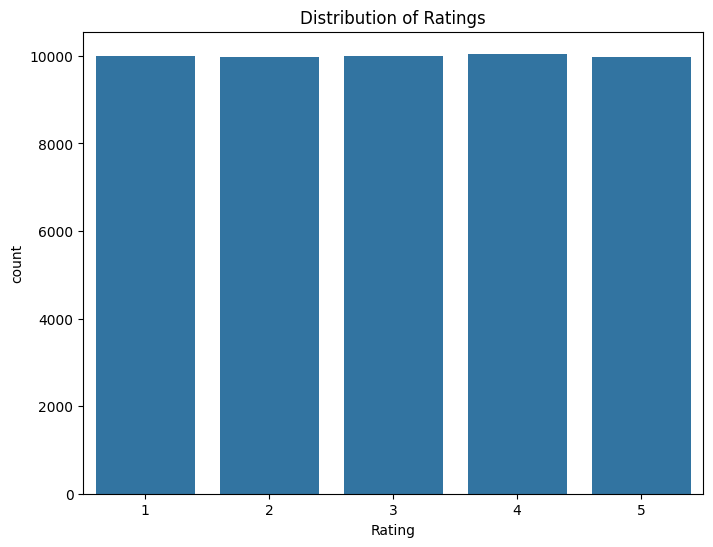

In [ ]:
# 2. What is the distribution of ratings in the dataset?
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
# 3. What is the average age of the users in the dataset?
average_age = df['Age'].mean()
print(f"3. Average age of users: {average_age:.2f}")

3. Average age of users: 40.06


In [ ]:
# 4. How many users are there for each gender?
gender_count = df['Gender'].value_counts()
print("4. Users count by gender:\n", gender_count)

4. Users count by gender:
 Female    18250
Other     16000
Male      15750
Name: Gender, dtype: int64


In [ ]:
# 5. What is the most common playtime of day among users?
common_playtime = df['PlayTimeOfDay'].mode().values[0]
print(f"5. Most common playtime of day: {common_playtime}")

5. Most common playtime of day: Night


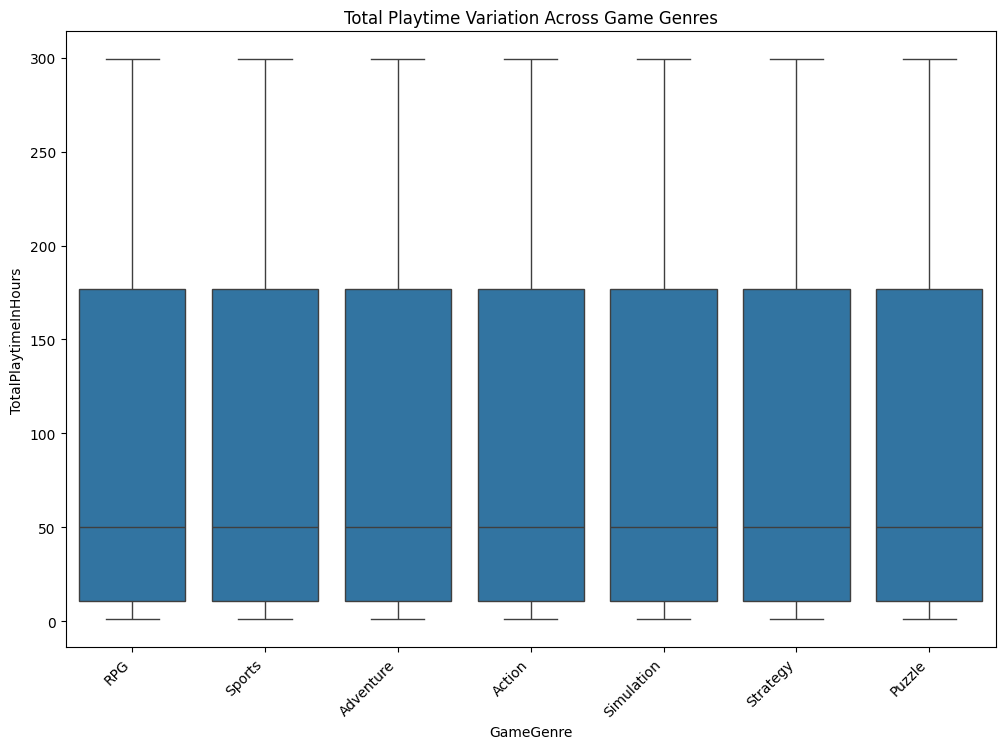

In [ ]:
# 6. How does the total playtime vary across different game genres?
plt.figure(figsize=(12, 8))
sns.boxplot(x='GameGenre', y='TotalPlaytimeInHours', data=df)
plt.title('Total Playtime Variation Across Game Genres')
plt.xticks(rotation=45, ha='right')
plt.show()

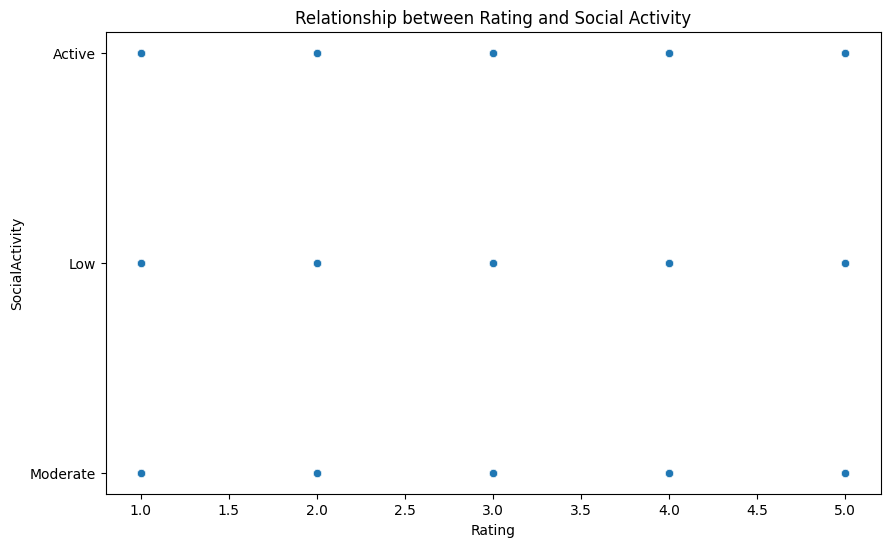

In [ ]:
# 7. What is the relationship between rating and social activity?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='SocialActivity', data=df)
plt.title('Relationship between Rating and Social Activity')
plt.show()

In [ ]:
# 8. What is the average loading time for each game genre?
avg_loading_time = df.groupby('GameGenre')['LoadingTimeInSeconds'].mean().sort_values(ascending=False)
print("8. Average loading time for each game genre:\n", avg_loading_time)

8. Average loading time for each game genre:
 GameGenre
Strategy      83.666667
Action        65.125000
Sports        64.000000
Adventure     52.181818
RPG           44.428571
Simulation    40.285714
Puzzle        23.750000
Name: LoadingTimeInSeconds, dtype: float64


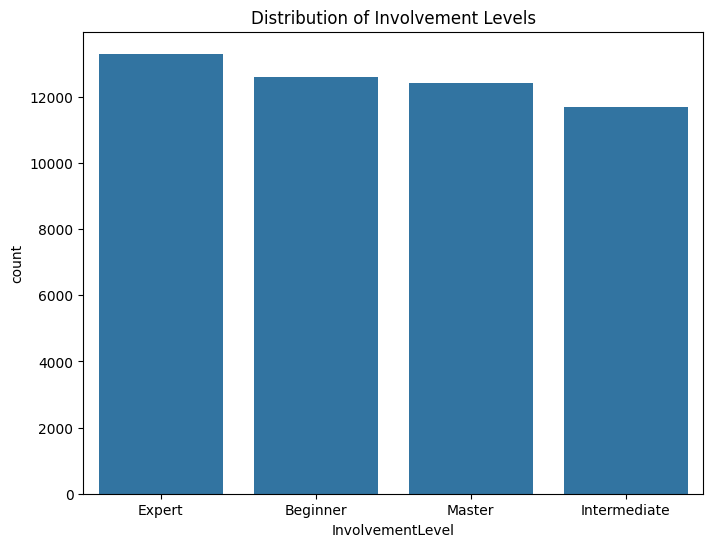

In [ ]:
# 9. How is the distribution of involvement levels among users?
plt.figure(figsize=(8, 6))
sns.countplot(x='InvolvementLevel', data=df, order=df['InvolvementLevel'].value_counts().index)
plt.title('Distribution of Involvement Levels')
plt.show()

<ipython-input-18-7706cc2e5c83>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


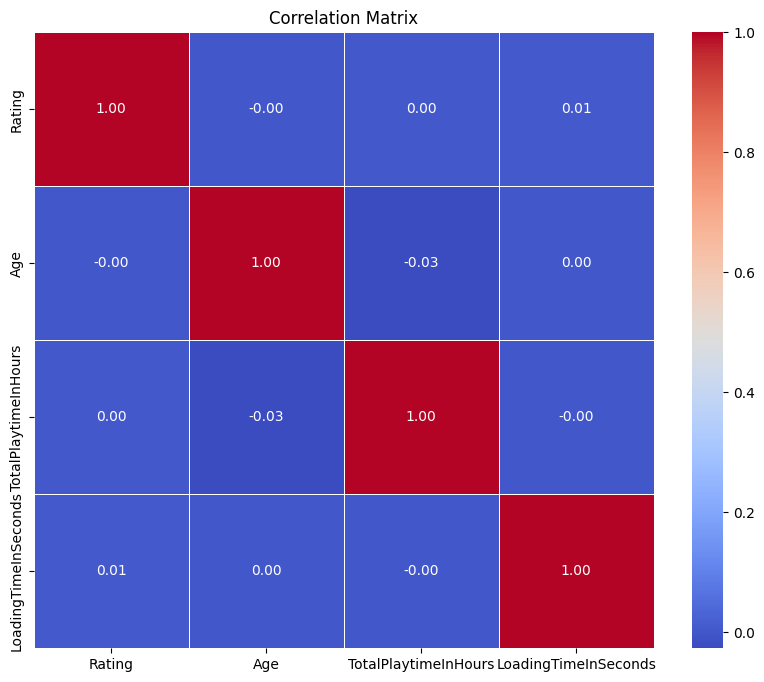

In [ ]:
# 10. What is the correlation matrix between numerical variables?
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

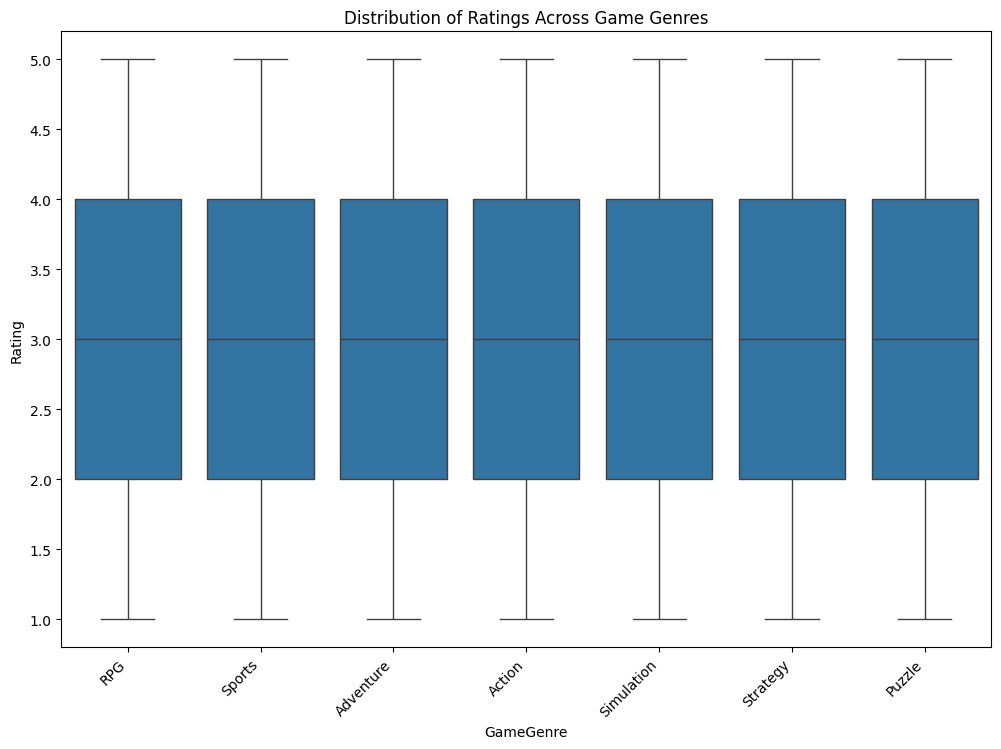

In [ ]:
# 11. What is the distribution of ratings for each game genre?
plt.figure(figsize=(12, 8))
sns.boxplot(x='GameGenre', y='Rating', data=df)
plt.title('Distribution of Ratings Across Game Genres')
plt.xticks(rotation=45, ha='right')
plt.show()

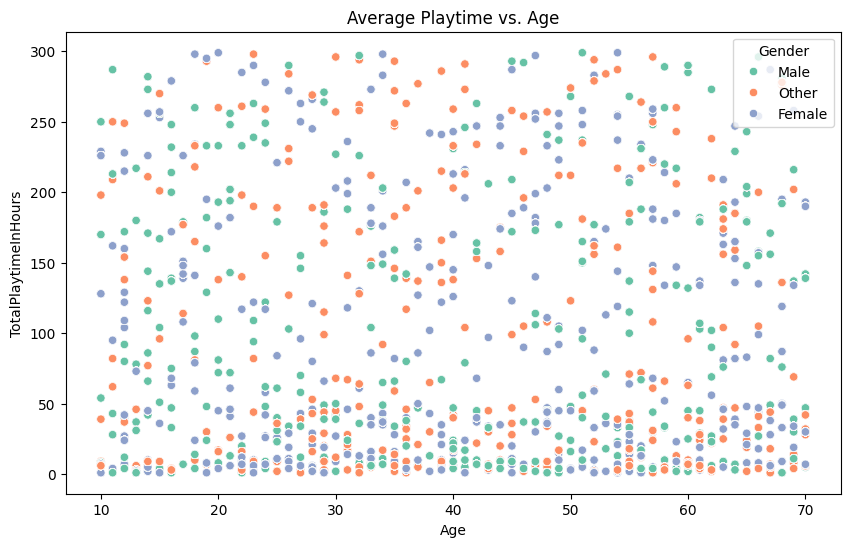

In [ ]:
# 12. How does the average playtime vary with age?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='TotalPlaytimeInHours', data=df, hue='Gender', palette='Set2')
plt.title('Average Playtime vs. Age')
plt.show()

In [ ]:
# 13. What is the most common device used by users?
common_device = df['Device'].mode().values[0]
print(f"13. Most common device used: {common_device}")

13. Most common device used: PC


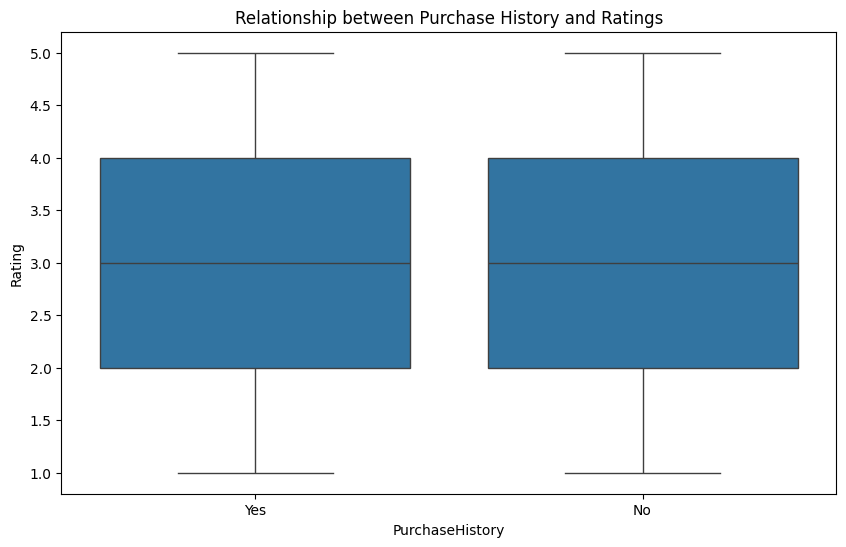

In [ ]:
# 14. How does the purchase history relate to user ratings?
plt.figure(figsize=(10, 6))
sns.boxplot(x='PurchaseHistory', y='Rating', data=df)
plt.title('Relationship between Purchase History and Ratings')
plt.show()

In [ ]:
# 15. What is the average playtime for each playtime of day category?
avg_playtime_by_time_of_day = df.groupby('PlayTimeOfDay')['TotalPlaytimeInHours'].mean().sort_values(ascending=False)
print("15. Average playtime for each playtime of day category:\n", avg_playtime_by_time_of_day)

15. Average playtime for each playtime of day category:
 PlayTimeOfDay
Night        99.228792
Morning      97.760766
Evening      94.158974
Afternoon    93.801932
Name: TotalPlaytimeInHours, dtype: float64


In [ ]:
# 16. How many users are there from each location?
location_count = df['Location'].value_counts()
print("16. Users count by location:\n", location_count)

16. Users count by location:
 South America    9100
Australia        8550
North America    8300
Asia             8250
Europe           8100
Africa           7700
Name: Location, dtype: int64


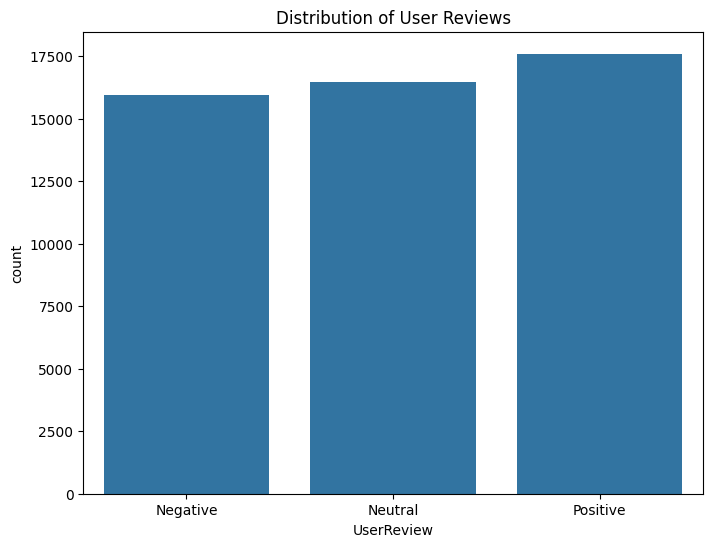

In [ ]:
# 17. What is the distribution of user reviews in the dataset?
plt.figure(figsize=(8, 6))
sns.countplot(x='UserReview', data=df)
plt.title('Distribution of User Reviews')
plt.show()

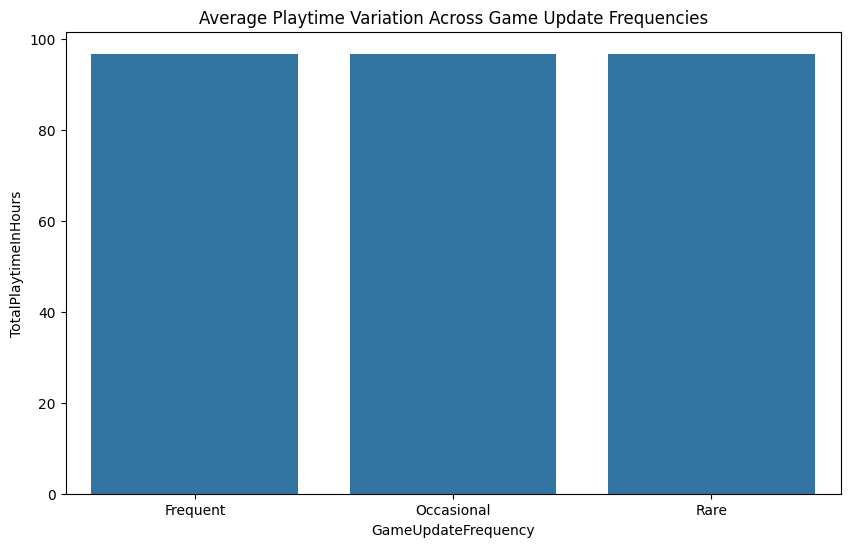

In [ ]:
# 18. How does the average playtime vary based on game update frequency?
plt.figure(figsize=(10, 6))
sns.barplot(x='GameUpdateFrequency', y='TotalPlaytimeInHours', data=df, errorbar=None)
plt.title('Average Playtime Variation Across Game Update Frequencies')
plt.show()

In [ ]:
# 19. What is the most common game settings preference among users?
common_settings_preference = df['GameSettingsPreference'].mode().values[0]
print(f"19. Most common game settings preference: {common_settings_preference}")

19. Most common game settings preference: High Graphics


In [ ]:
# 20. How many users fall into each age group (e.g., 20-30, 30-40, etc.)?
age_bins = [20, 30, 40, 50, 60, 70, 100]
age_groups = pd.cut(df['Age'], bins=age_bins)
age_group_count = age_groups.value_counts().sort_index()
print("20. Users count in each age group:\n", age_group_count)

20. Users count in each age group:
 (20, 30]     8500
(30, 40]     8500
(40, 50]     7500
(50, 60]     8700
(60, 70]     8150
(70, 100]       0
Name: Age, dtype: int64


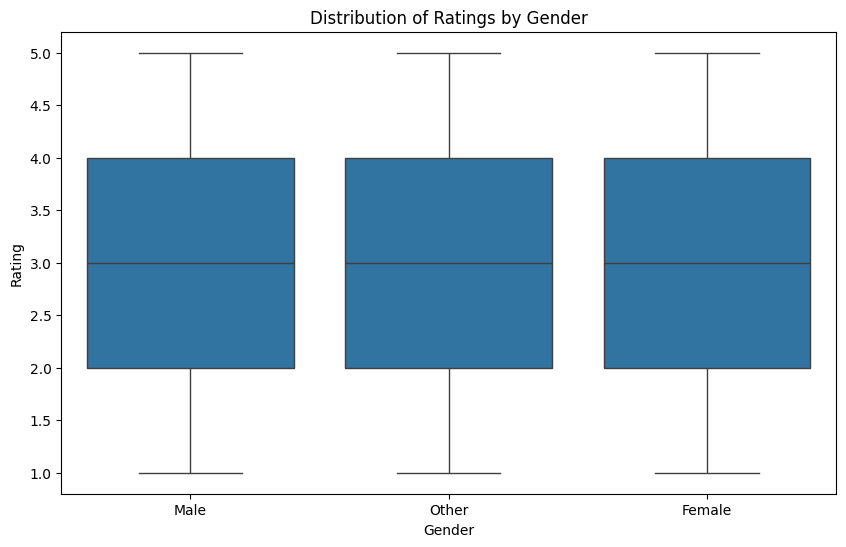

In [ ]:
# 21. How does the distribution of ratings differ between genders?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Rating', data=df)
plt.title('Distribution of Ratings by Gender')
plt.show()

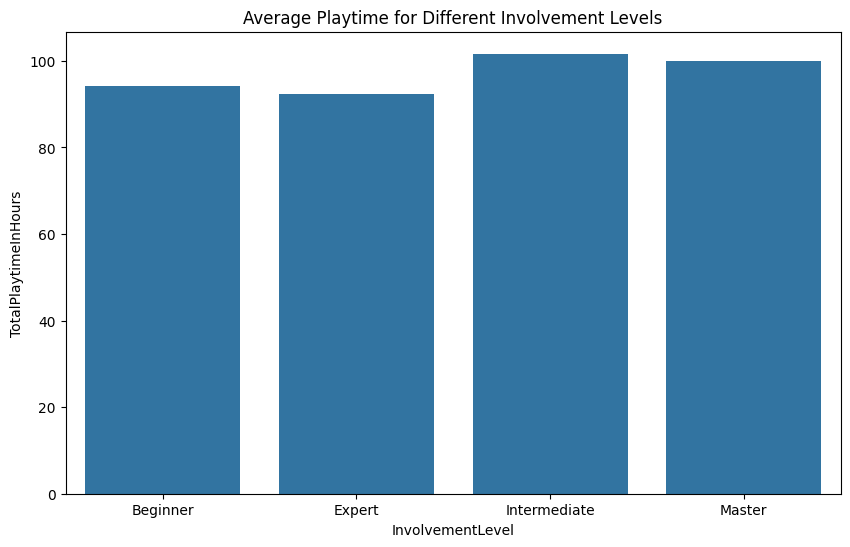

In [ ]:
# 22. What is the average playtime for users with different involvement levels?
plt.figure(figsize=(10, 6))
sns.barplot(x='InvolvementLevel', y='TotalPlaytimeInHours', data=df, errorbar=None)
plt.title('Average Playtime for Different Involvement Levels')
plt.show()

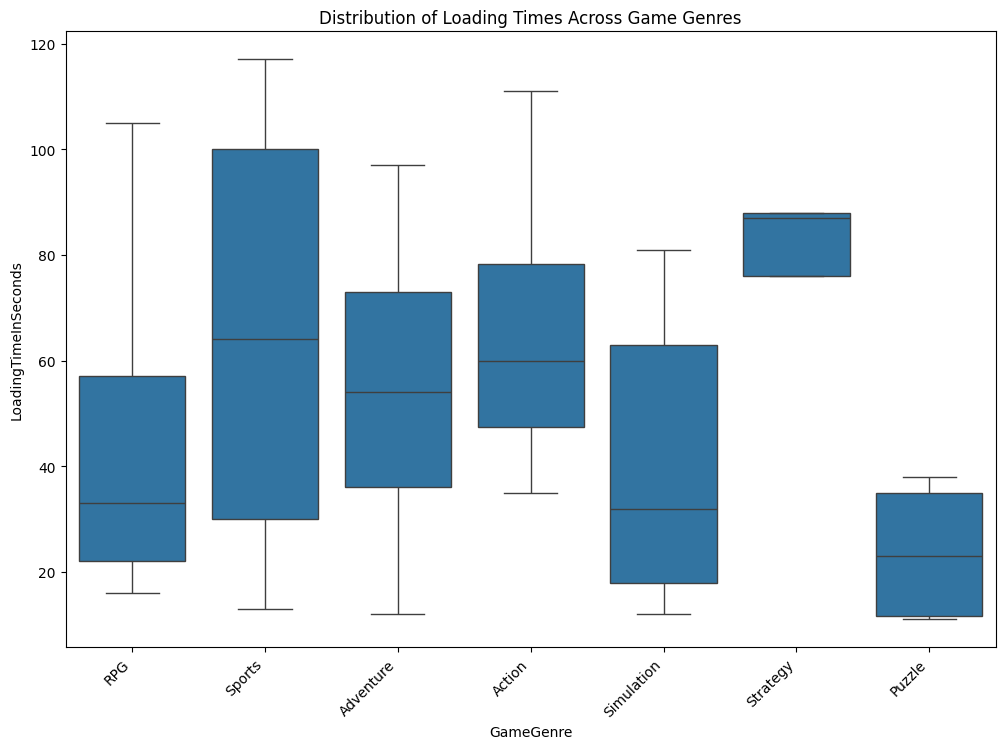

In [ ]:
# 23. How is the distribution of loading times across different game genres?
plt.figure(figsize=(12, 8))
sns.boxplot(x='GameGenre', y='LoadingTimeInSeconds', data=df)
plt.title('Distribution of Loading Times Across Game Genres')
plt.xticks(rotation=45, ha='right')
plt.show()

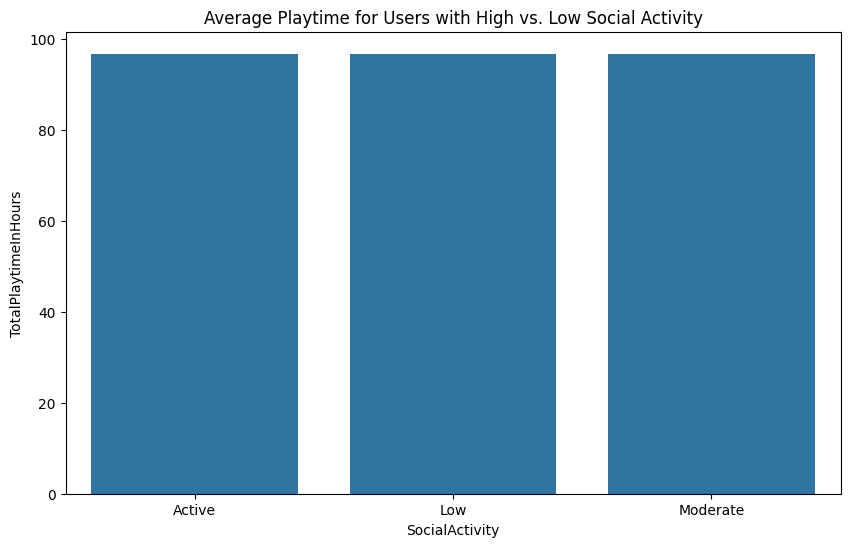

In [ ]:
# 24. What is the average playtime for users with high vs. low social activity?
plt.figure(figsize=(10, 6))
sns.barplot(x='SocialActivity', y='TotalPlaytimeInHours', data=df, errorbar=None)
plt.title('Average Playtime for Users with High vs. Low Social Activity')
plt.show()

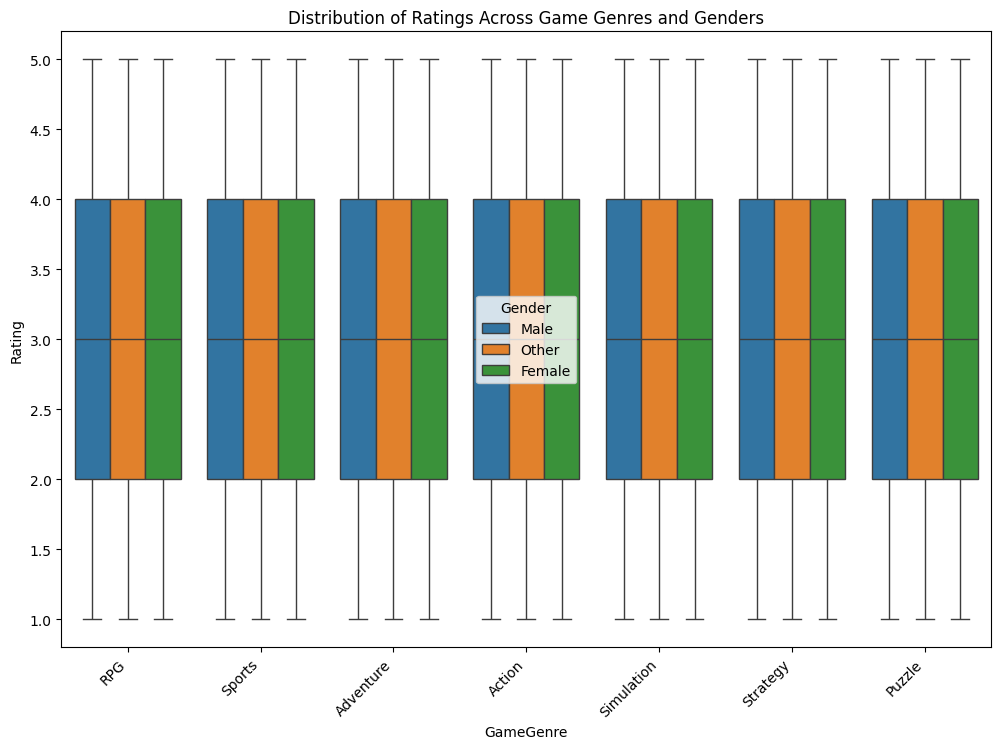

In [ ]:
# 25. How does the distribution of ratings vary with different game genres and genders?
plt.figure(figsize=(12, 8))
sns.boxplot(x='GameGenre', y='Rating', hue='Gender', data=df)
plt.title('Distribution of Ratings Across Game Genres and Genders')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# 26. What is the average age of users for each game genre?
avg_age_by_genre = df.groupby('GameGenre')['Age'].mean().sort_values(ascending=False)
print("26. Average age of users for each game genre:\n", avg_age_by_genre)

26. Average age of users for each game genre:
 GameGenre
Action        40.059
Adventure     40.059
Puzzle        40.059
RPG           40.059
Simulation    40.059
Sports        40.059
Strategy      40.059
Name: Age, dtype: float64


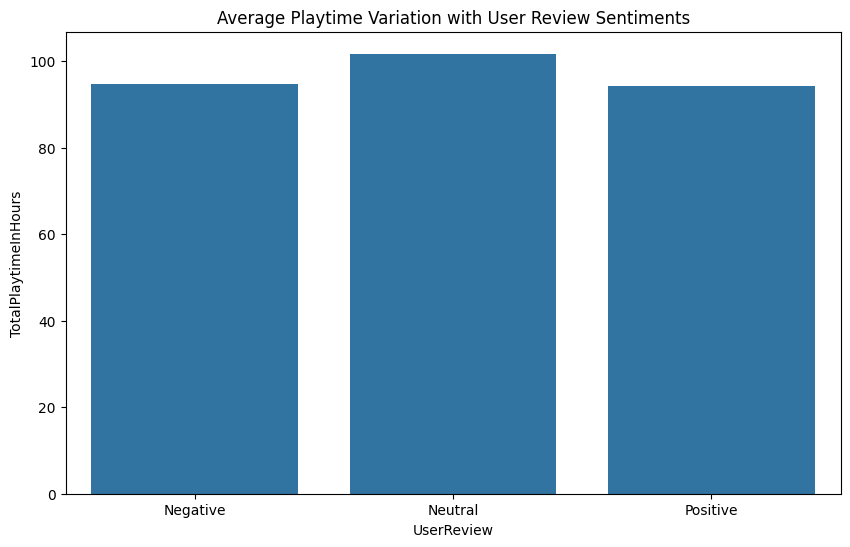

In [ ]:
# 27. How does the average playtime vary with different user review sentiments?
plt.figure(figsize=(10, 6))
sns.barplot(x='UserReview', y='TotalPlaytimeInHours', data=df, errorbar=None)
plt.title('Average Playtime Variation with User Review Sentiments')
plt.show()

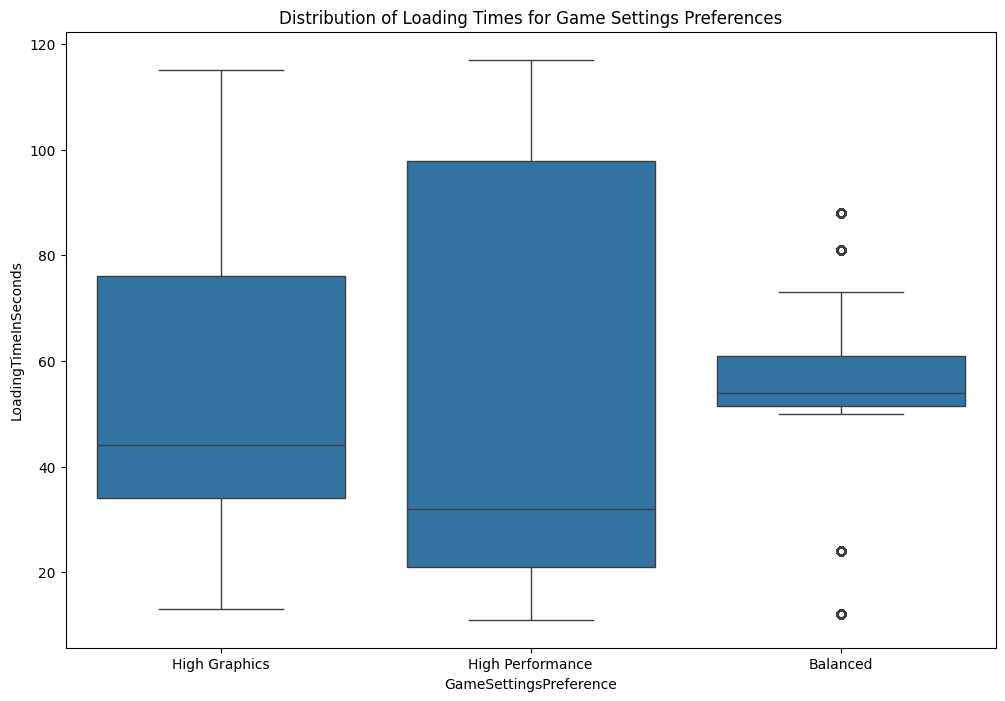

In [ ]:
# 28. What is the distribution of loading times for different game settings preferences?
plt.figure(figsize=(12, 8))
sns.boxplot(x='GameSettingsPreference', y='LoadingTimeInSeconds', data=df)
plt.title('Distribution of Loading Times for Game Settings Preferences')
plt.show()

In [ ]:
# 29. How many users have made purchases and how many have not?
purchase_history_count = df['PurchaseHistory'].value_counts()
print("29. Users count based on purchase history:\n", purchase_history_count)

29. Users count based on purchase history:
 No     34600
Yes    15400
Name: PurchaseHistory, dtype: int64


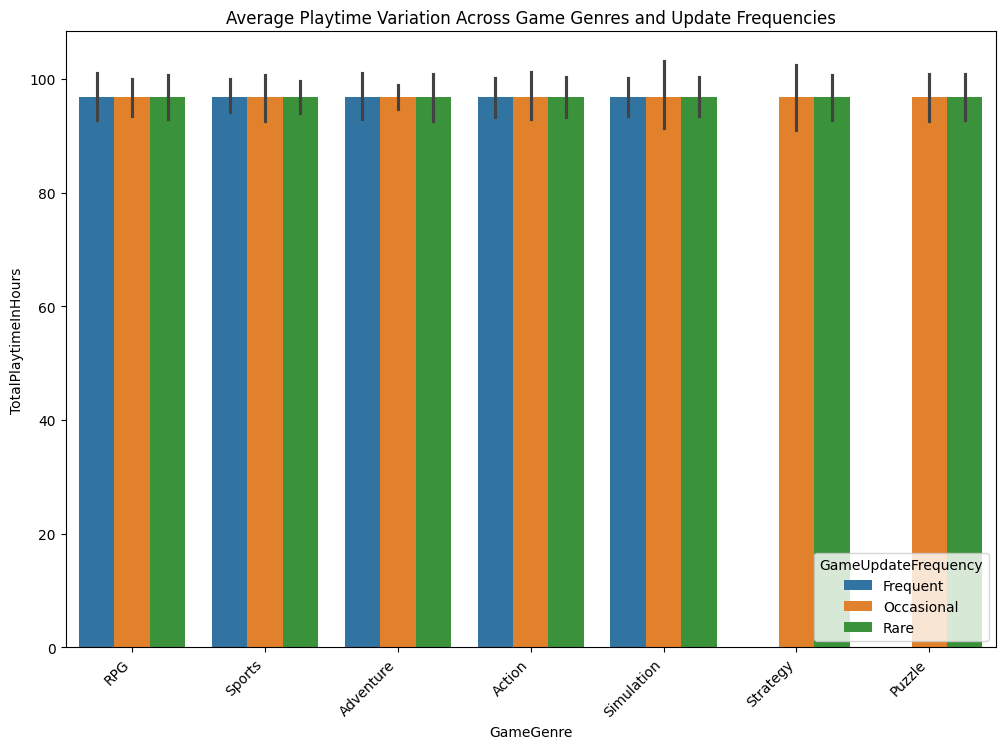

In [ ]:
# 30. How does the average playtime vary with different game genres and update frequencies?
plt.figure(figsize=(12, 8))
sns.barplot(x='GameGenre', y='TotalPlaytimeInHours', hue='GameUpdateFrequency', data=df)
plt.title('Average Playtime Variation Across Game Genres and Update Frequencies')
plt.xticks(rotation=45, ha='right')
plt.show()

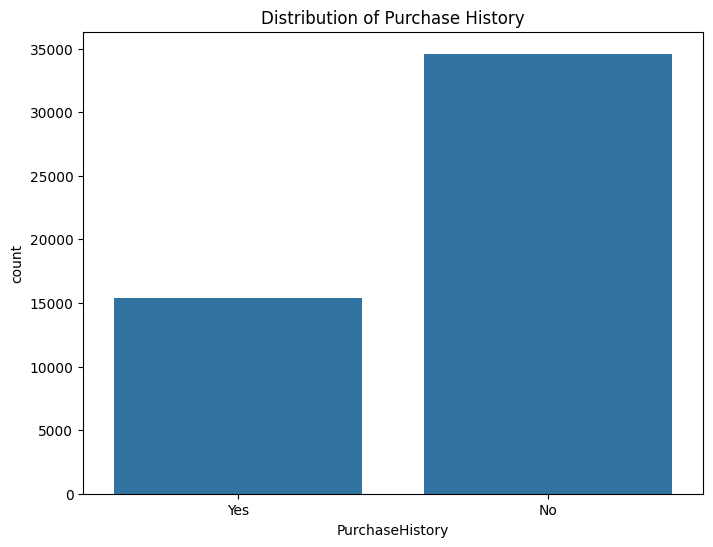

In [ ]:
# 31. What is the distribution of purchase history in the dataset?
plt.figure(figsize=(8, 6))
sns.countplot(x='PurchaseHistory', data=df)
plt.title('Distribution of Purchase History')
plt.show()

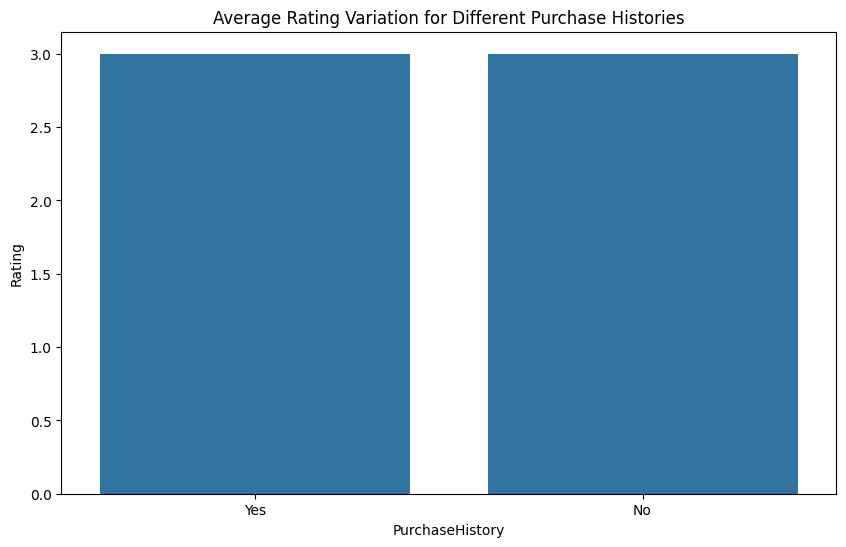

In [ ]:
# 32. How does the average rating vary for users with different purchase histories?
plt.figure(figsize=(10, 6))
sns.barplot(x='PurchaseHistory', y='Rating', data=df, errorbar=None)
plt.title('Average Rating Variation for Different Purchase Histories')
plt.show()

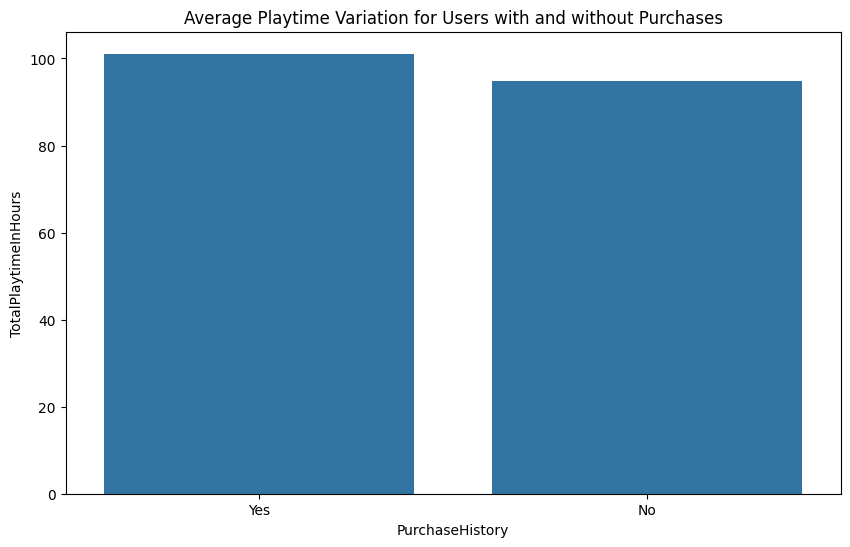

In [ ]:
# 33. What is the average playtime for users who have made purchases and those who haven't?
plt.figure(figsize=(10, 6))
sns.barplot(x='PurchaseHistory', y='TotalPlaytimeInHours', data=df, errorbar=None)
plt.title('Average Playtime Variation for Users with and without Purchases')
plt.show()

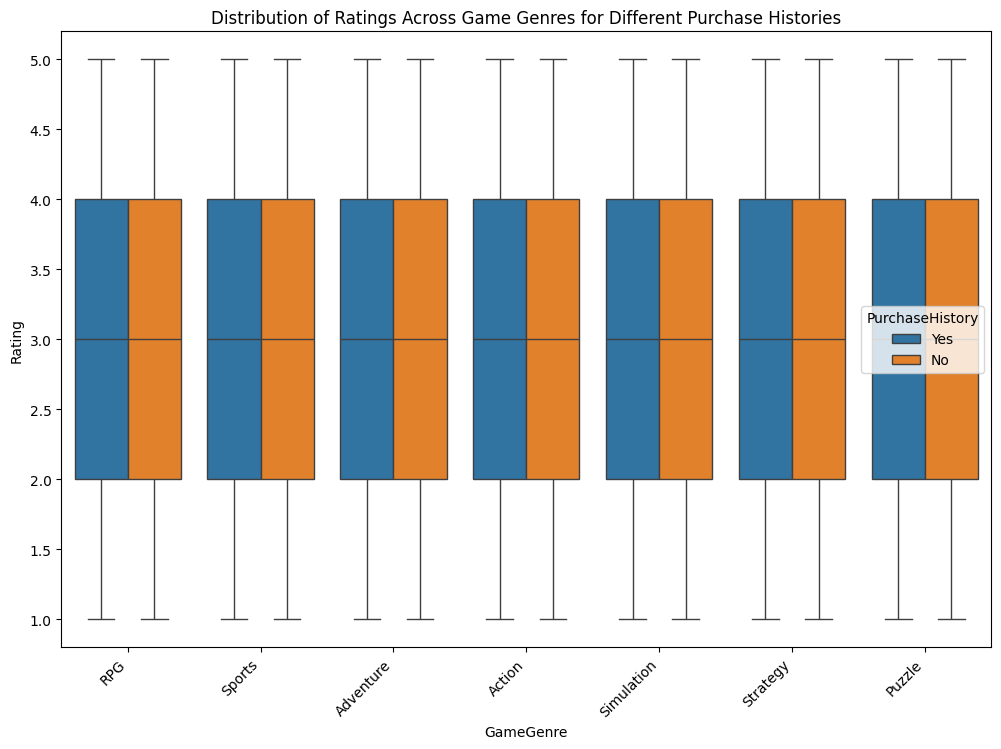

In [ ]:
# 34. How does the distribution of ratings vary for users with different game genres and purchase histories?
plt.figure(figsize=(12, 8))
sns.boxplot(x='GameGenre', y='Rating', hue='PurchaseHistory', data=df)
plt.title('Distribution of Ratings Across Game Genres for Different Purchase Histories')
plt.xticks(rotation=45, ha='right')
plt.show()

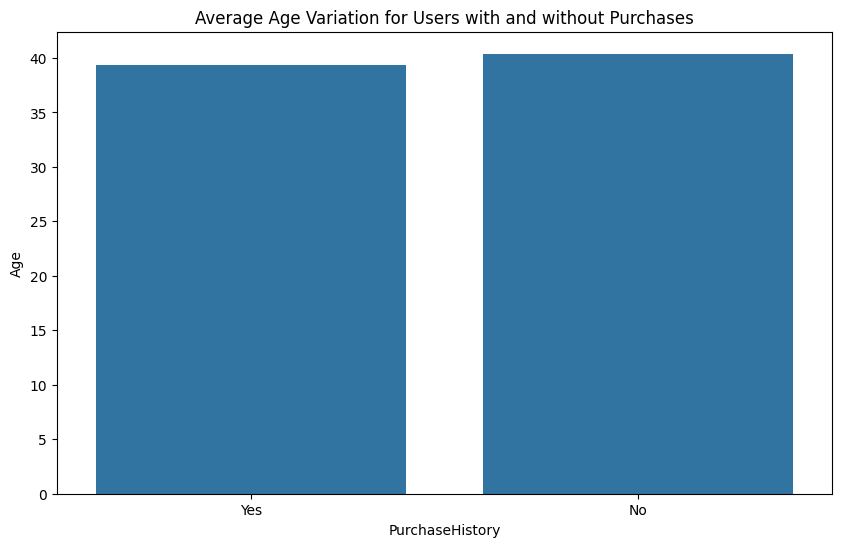

In [ ]:
# 35. What is the average age of users who have made purchases and those who haven't?
plt.figure(figsize=(10, 6))
sns.barplot(x='PurchaseHistory', y='Age', data=df, errorbar=None)
plt.title('Average Age Variation for Users with and without Purchases')
plt.show()

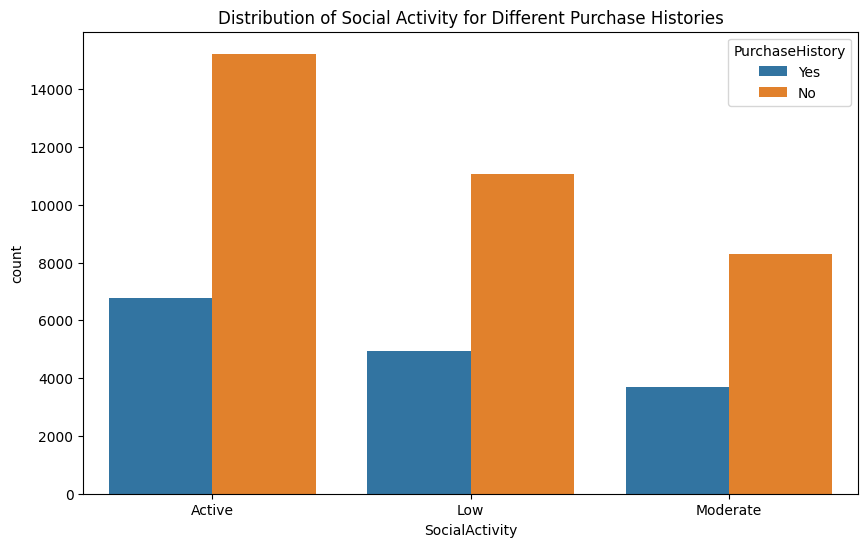

In [ ]:
# 36. How does the distribution of social activity differ for users with different purchase histories?
plt.figure(figsize=(10, 6))
sns.countplot(x='SocialActivity', hue='PurchaseHistory', data=df)
plt.title('Distribution of Social Activity for Different Purchase Histories')
plt.show()

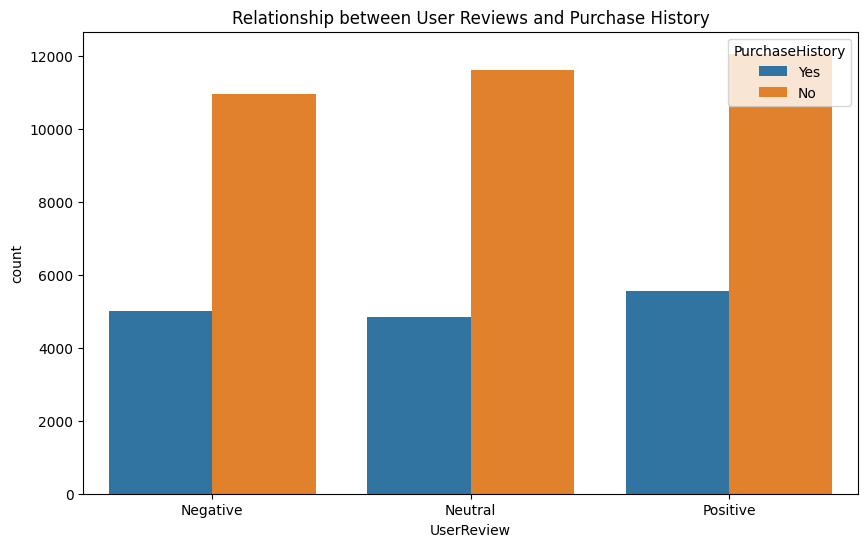

In [ ]:
# 37. What is the relationship between user reviews and purchase history?
plt.figure(figsize=(10, 6))
sns.countplot(x='UserReview', hue='PurchaseHistory', data=df)
plt.title('Relationship between User Reviews and Purchase History')
plt.show()

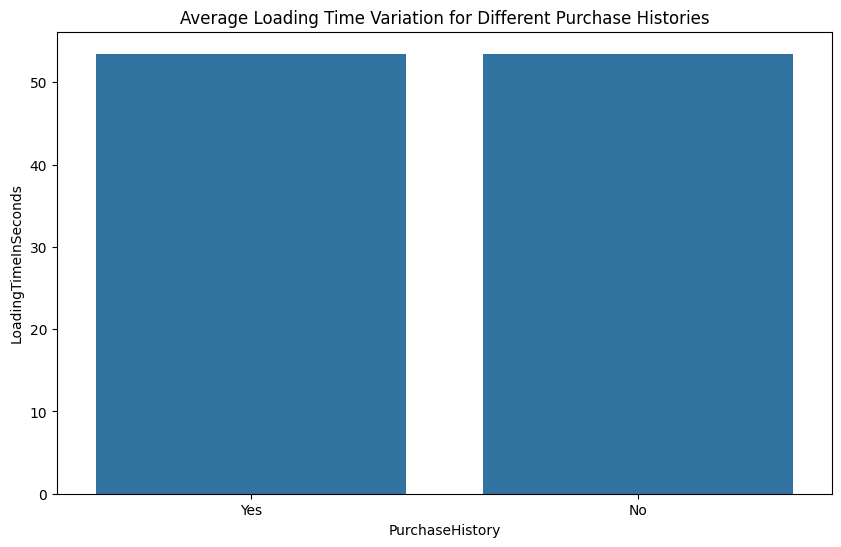

In [ ]:
# 38. How does the average loading time vary for users with different purchase histories?
plt.figure(figsize=(10, 6))
sns.barplot(x='PurchaseHistory', y='LoadingTimeInSeconds', data=df, errorbar=None)
plt.title('Average Loading Time Variation for Different Purchase Histories')
plt.show()

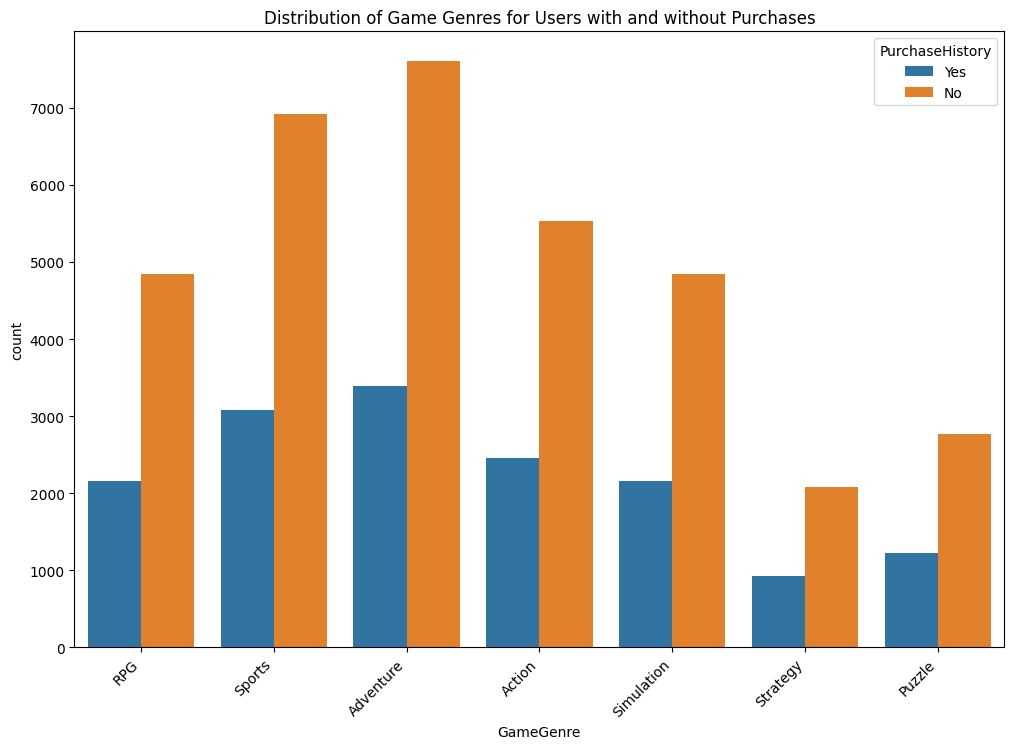

In [ ]:
# 39. What is the distribution of game genres for users with and without purchases?
plt.figure(figsize=(12, 8))
sns.countplot(x='GameGenre', hue='PurchaseHistory', data=df)
plt.title('Distribution of Game Genres for Users with and without Purchases')
plt.xticks(rotation=45, ha='right')
plt.show()

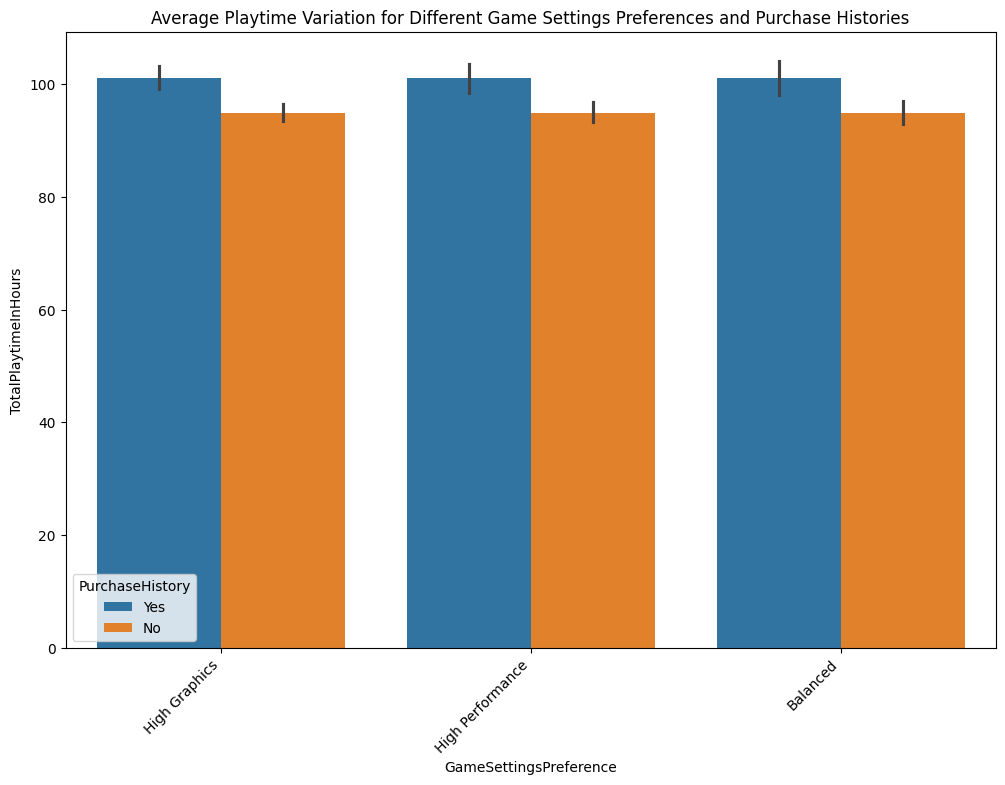

In [ ]:
# 40. How does the average playtime vary for users with different game settings preferences and purchase histories?
plt.figure(figsize=(12, 8))
sns.barplot(x='GameSettingsPreference', y='TotalPlaytimeInHours', hue='PurchaseHistory', data=df)
plt.title('Average Playtime Variation for Different Game Settings Preferences and Purchase Histories')
plt.xticks(rotation=45, ha='right')
plt.show()

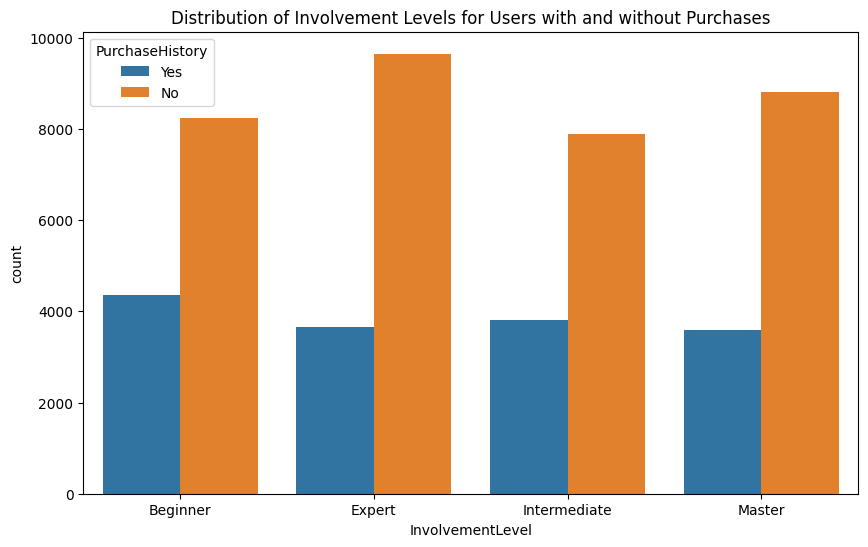

In [ ]:
# 41. What is the distribution of involvement levels for users with and without purchases?
plt.figure(figsize=(10, 6))
sns.countplot(x='InvolvementLevel', hue='PurchaseHistory', data=df)
plt.title('Distribution of Involvement Levels for Users with and without Purchases')
plt.show()

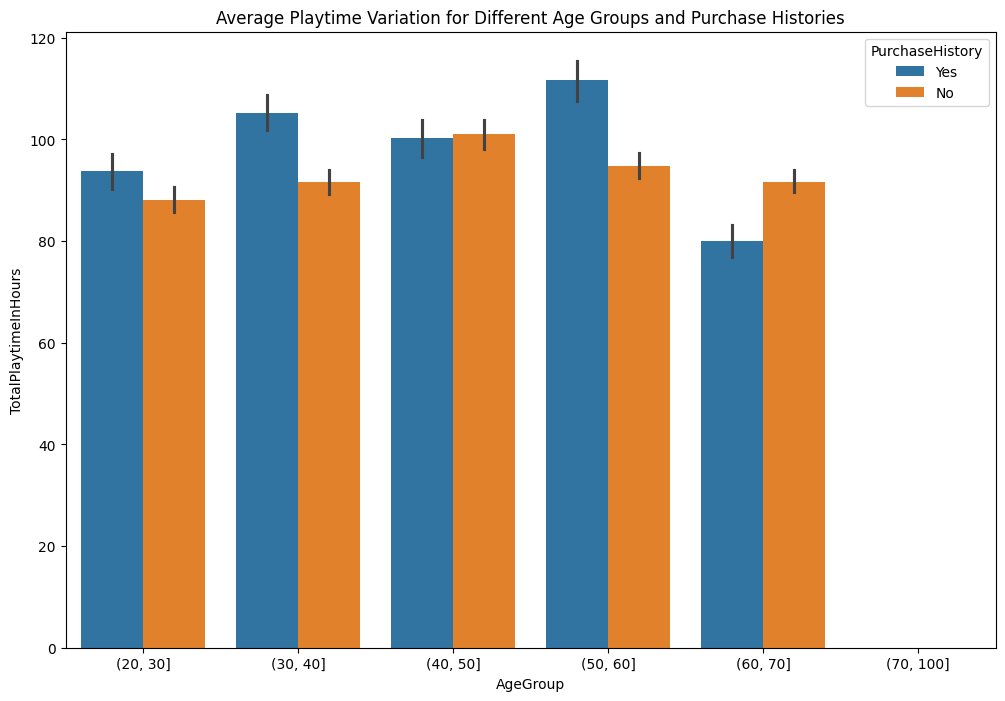

In [ ]:
# 42. How does the average playtime vary for different age groups and purchase histories?
age_bins = [20, 30, 40, 50, 60, 70, 100]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)
plt.figure(figsize=(12, 8))
sns.barplot(x='AgeGroup', y='TotalPlaytimeInHours', hue='PurchaseHistory', data=df)
plt.title('Average Playtime Variation for Different Age Groups and Purchase Histories')
plt.show()

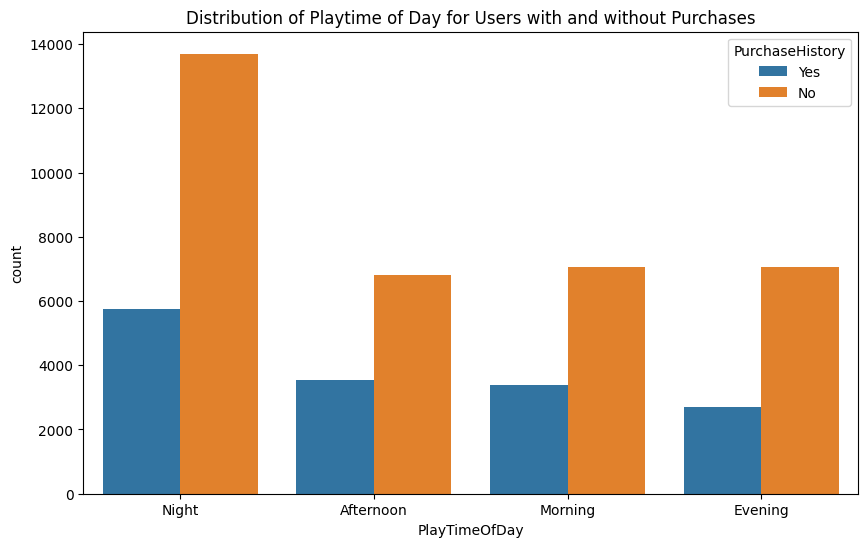

In [ ]:
# 43. What is the distribution of playtime of day categories for users with and without purchases?
plt.figure(figsize=(10, 6))
sns.countplot(x='PlayTimeOfDay', hue='PurchaseHistory', data=df)
plt.title('Distribution of Playtime of Day for Users with and without Purchases')
plt.show()

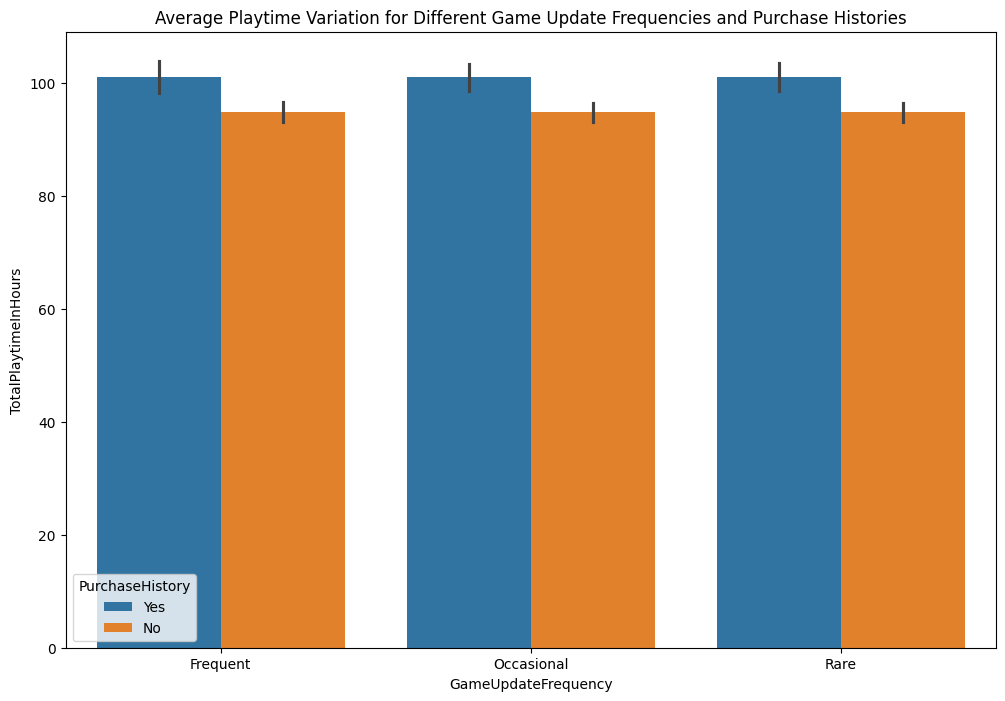

In [ ]:
# 44. How does the average playtime vary for users with different update frequencies and purchase histories?
plt.figure(figsize=(12, 8))
sns.barplot(x='GameUpdateFrequency', y='TotalPlaytimeInHours', hue='PurchaseHistory', data=df)
plt.title('Average Playtime Variation for Different Game Update Frequencies and Purchase Histories')
plt.show()

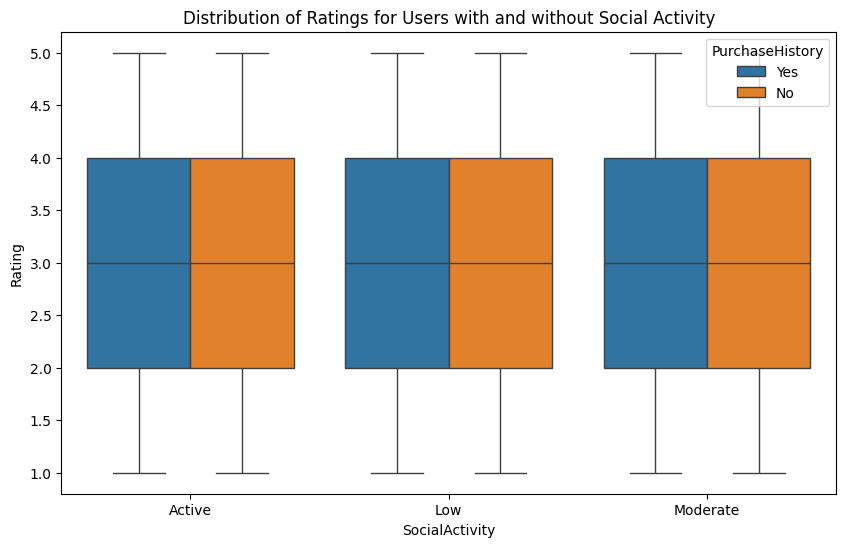

In [ ]:
# 45. What is the distribution of ratings for users with and without social activity?
plt.figure(figsize=(10, 6))
sns.boxplot(x='SocialActivity', y='Rating', hue='PurchaseHistory', data=df)
plt.title('Distribution of Ratings for Users with and without Social Activity')
plt.show()

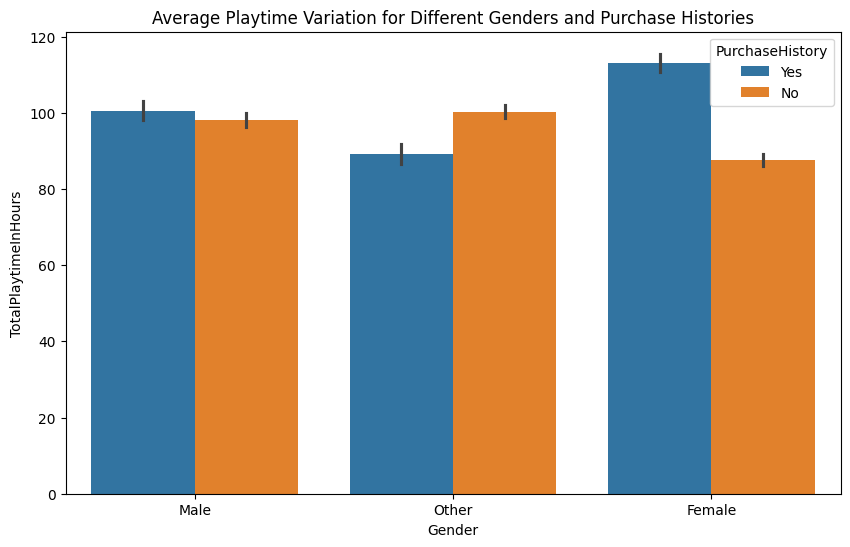

In [ ]:
# 46. How does the average playtime vary for users with different genders and purchase histories?
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='TotalPlaytimeInHours', hue='PurchaseHistory', data=df)
plt.title('Average Playtime Variation for Different Genders and Purchase Histories')
plt.show()

In [ ]:
# 47. What is the average age of users for each purchase history category?
avg_age_by_purchase_history = df.groupby('PurchaseHistory')['Age'].mean()
print("47. Average age of users for each purchase history category:\n", avg_age_by_purchase_history)

47. Average age of users for each purchase history category:
 PurchaseHistory
No     40.385838
Yes    39.324675
Name: Age, dtype: float64


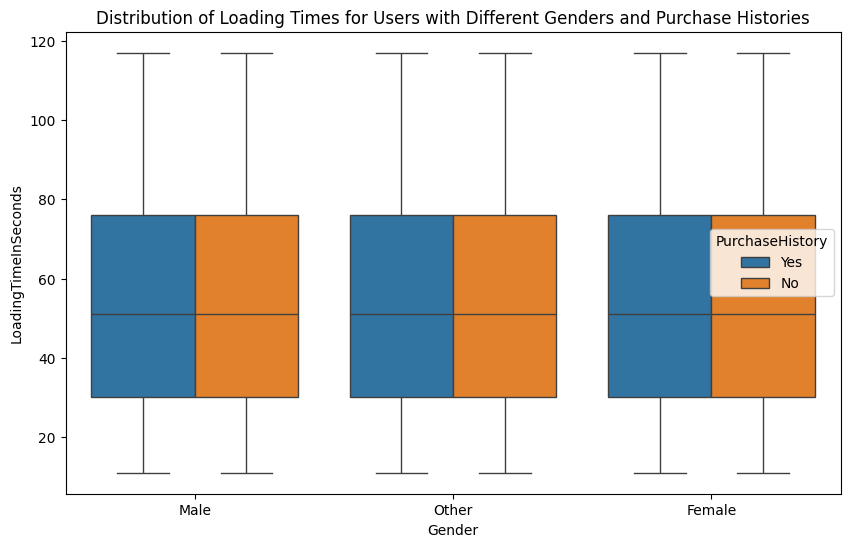

In [ ]:
# 48. How does the distribution of loading times vary for users with different genders and purchase histories?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='LoadingTimeInSeconds', hue='PurchaseHistory', data=df)
plt.title('Distribution of Loading Times for Users with Different Genders and Purchase Histories')
plt.show()

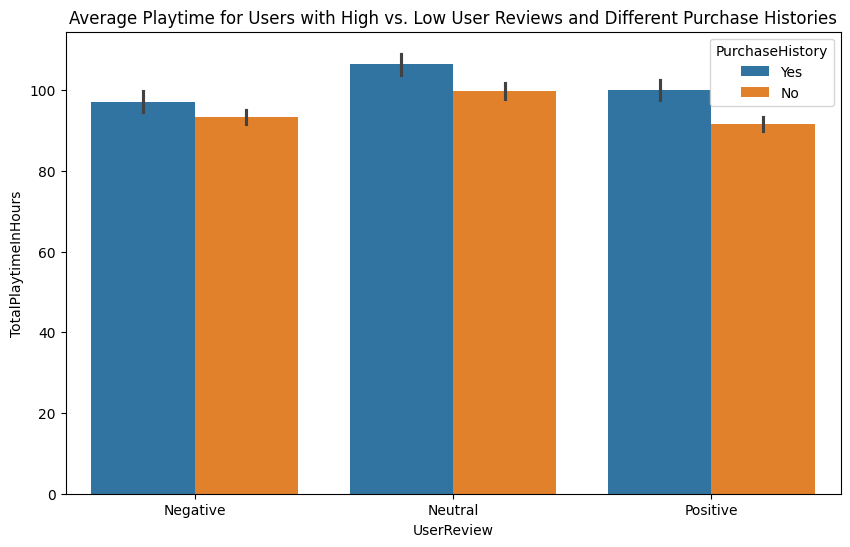

In [ ]:
# 49. What is the average playtime for users with high vs. low user reviews and different purchase histories?
plt.figure(figsize=(10, 6))
sns.barplot(x='UserReview', y='TotalPlaytimeInHours', hue='PurchaseHistory', data=df)
plt.title('Average Playtime for Users with High vs. Low User Reviews and Different Purchase Histories')
plt.show()

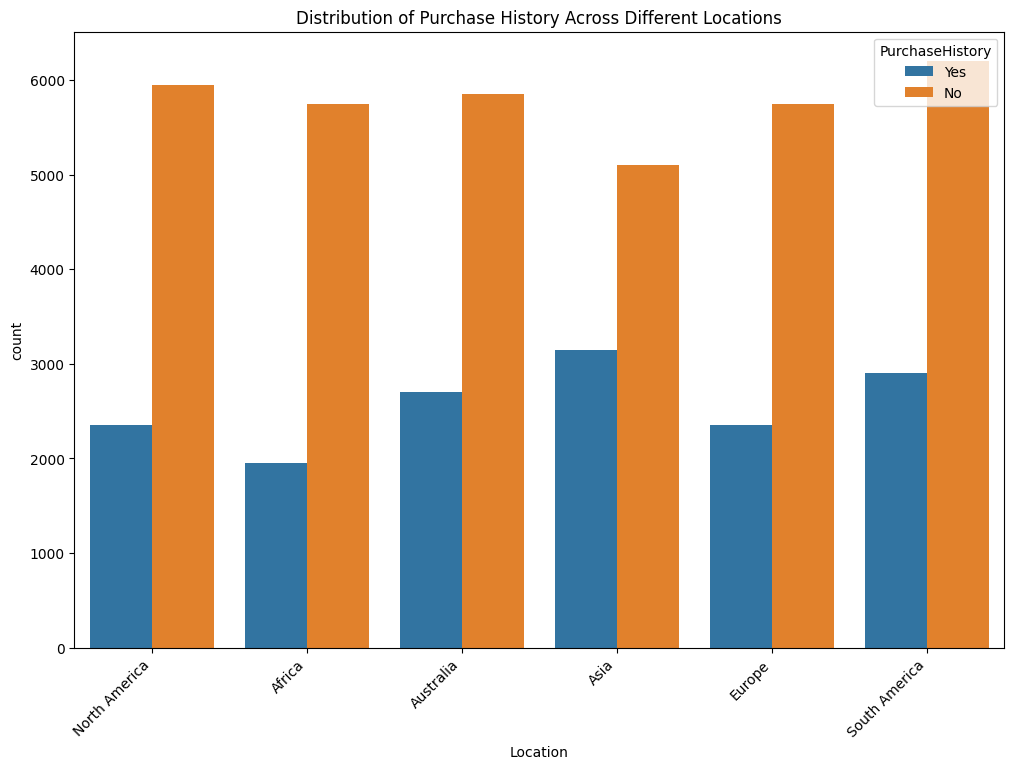

In [ ]:
# 50. How does the distribution of purchase history vary across different locations?
plt.figure(figsize=(12, 8))
sns.countplot(x='Location', hue='PurchaseHistory', data=df)
plt.title('Distribution of Purchase History Across Different Locations')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# 51. What is the distribution of users across different locations?
location_distribution = df['Location'].value_counts().reset_index()
location_distribution.columns = ['Location', 'User Count']

fig = px.bar(location_distribution, x='Location', y='User Count',
             title='Distribution of Users Across Different Locations',
             labels={'Location': 'Location', 'User Count': 'Number of Users'})
fig.show()

In [ ]:
# 52. How does the average playtime vary for users across different locations?
avg_playtime_by_location = df.groupby('Location')['TotalPlaytimeInHours'].mean().reset_index()

fig = px.bar(avg_playtime_by_location, x='Location', y='TotalPlaytimeInHours',
             title='Average Playtime Variation Across Different Locations',
             labels={'Location': 'Location', 'TotalPlaytimeInHours': 'Average Playtime (Hours)'})
fig.show()

In [ ]:
# 53. What is the distribution of ratings for users in different locations?
fig = px.box(df, x='Location', y='Rating',
             title='Distribution of Ratings Across Different Locations',
             labels={'Location': 'Location', 'Rating': 'User Rating'})
fig.show()

In [ ]:
# 54. How does the distribution of purchase history vary across different locations?
fig = px.histogram(df, x='Location', color='PurchaseHistory',
                   title='Distribution of Purchase History Across Different Locations',
                   labels={'Location': 'Location', 'PurchaseHistory': 'Purchase History'})
fig.show()

In [ ]:
# 55. What is the average age of users in different locations?
avg_age_by_location = df.groupby('Location')['Age'].mean().reset_index()

fig = px.bar(avg_age_by_location, x='Location', y='Age',
             title='Average Age of Users Across Different Locations',
             labels={'Location': 'Location', 'Age': 'Average Age'})
fig.show()

In [ ]:
# 56. How does the distribution of game genres vary for users in different locations?
location_genre_distribution = df.groupby(['Location', 'GameGenre']).size().reset_index(name='User Count')

fig = px.bar(location_genre_distribution, x='Location', y='User Count', color='GameGenre',
             title='Distribution of Game Genres Across Different Locations',
             labels={'Location': 'Location', 'User Count': 'Number of Users', 'GameGenre': 'Game Genre'})
fig.show()

In [ ]:
# 57. What is the average loading time for users in different locations?
avg_loading_time_by_location = df.groupby('Location')['LoadingTimeInSeconds'].mean().reset_index()

fig = px.bar(avg_loading_time_by_location, x='Location', y='LoadingTimeInSeconds',
             title='Average Loading Time for Users Across Different Locations',
             labels={'Location': 'Location', 'LoadingTimeInSeconds': 'Average Loading Time (Seconds)'})
fig.show()

In [ ]:
# 58. How does the distribution of involvement levels vary for users in different locations?
location_involvement_distribution = df.groupby(['Location', 'InvolvementLevel']).size().reset_index(name='User Count')

fig = px.bar(location_involvement_distribution, x='Location', y='User Count', color='InvolvementLevel',
             title='Distribution of Involvement Levels Across Different Locations',
             labels={'Location': 'Location', 'User Count': 'Number of Users', 'InvolvementLevel': 'Involvement Level'})
fig.show()

In [ ]:
# 59. How is the distribution of user reviews across different locations?
fig = px.histogram(df, x='Location', color='UserReview',
                   title='Distribution of User Reviews Across Different Locations',
                   labels={'Location': 'Location', 'UserReview': 'User Review'})
fig.show()

In [ ]:
# 60. How does the average playtime vary for users in different locations and genders?
fig = px.bar(df, x='Location', y='TotalPlaytimeInHours', color='Gender',
             title='Average Playtime Variation for Users Across Different Locations and Genders',
             labels={'Location': 'Location', 'TotalPlaytimeInHours': 'Average Playtime (Hours)', 'Gender': 'Gender'})
fig.show()

### Feature importance

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

<ipython-input-85-7435b8b9d30f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



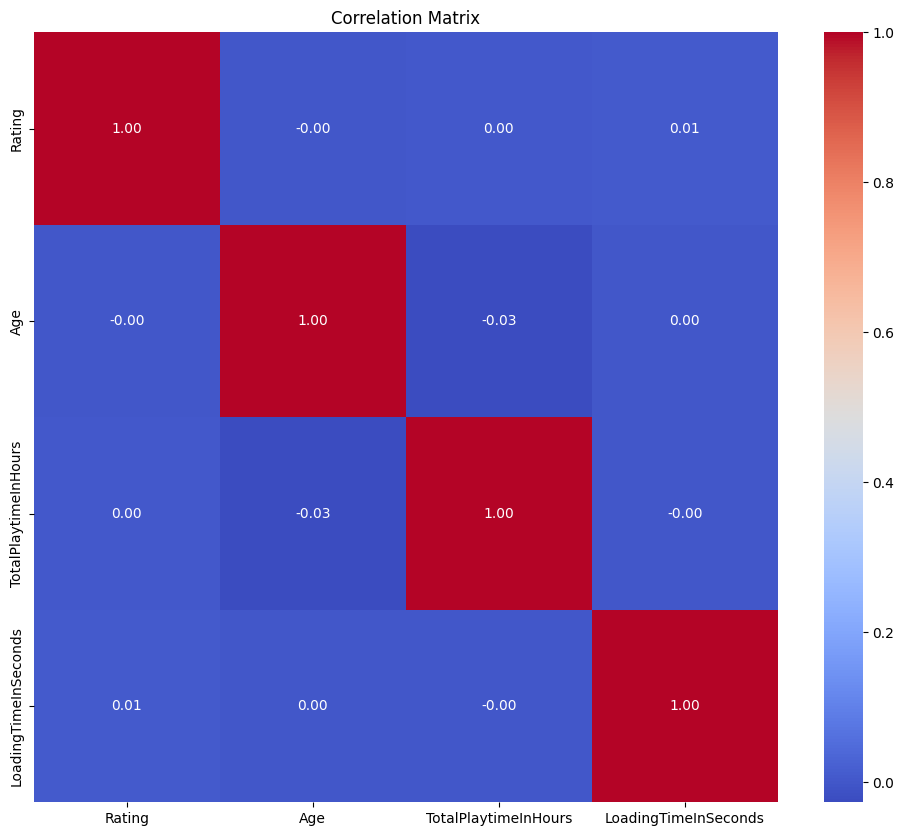

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Feature importance using RandomForestClassifier
X = df.drop(["UserID", "GameTitle", "PurchaseHistory"], axis=1)
y = df["PurchaseHistory"]  # Target variable

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

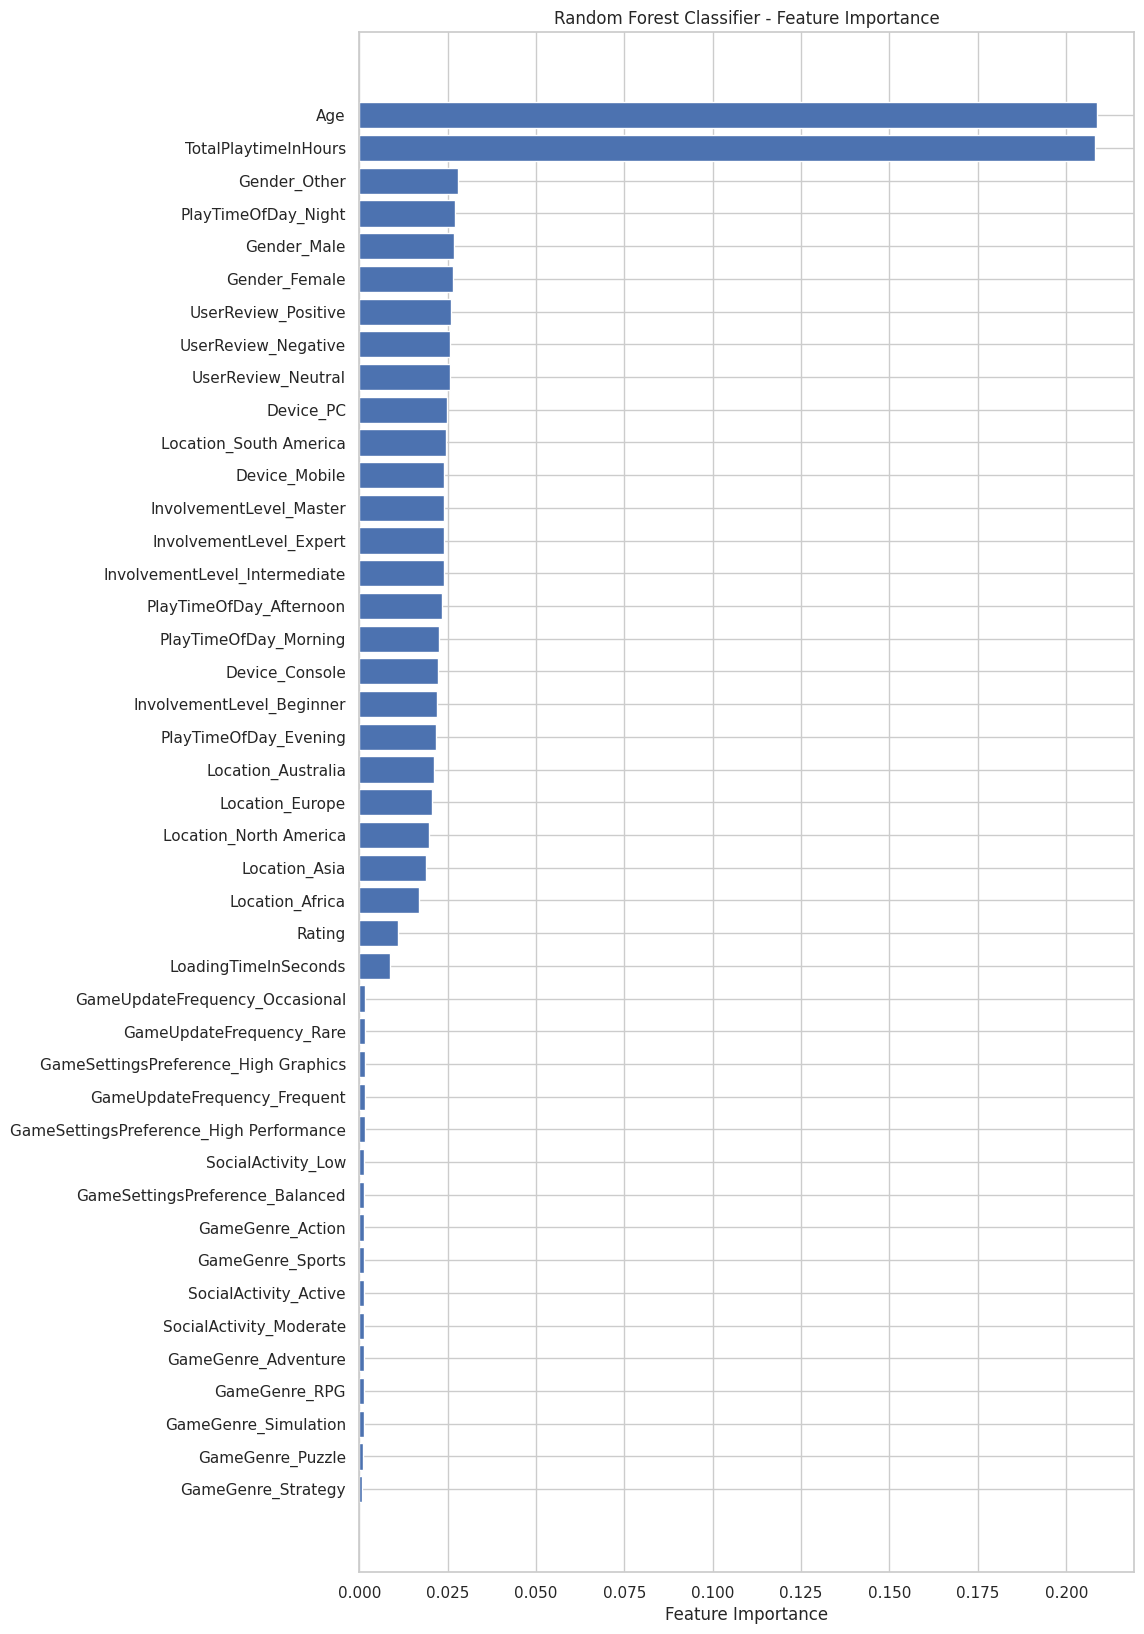

In [ ]:
# Feature importance plot
feature_importance = clf.feature_importances_
features = X.columns
sorted_idx = feature_importance.argsort()


plt.figure(figsize=(10, 20))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Classifier - Feature Importance")
plt.show()

In [ ]:
# Select important features using SelectFromModel
sfm = SelectFromModel(clf, threshold=0.05)
sfm.fit(X_train, y_train)

selected_features_sfm = X.columns[sfm.get_support()]
print("Selected Features using SelectFromModel:", selected_features_sfm)

Selected Features using SelectFromModel: Index(['Age', 'TotalPlaytimeInHours'], dtype='object')


In [ ]:
# Feature importance using Recursive Feature Elimination (RFE)
rfe = RFE(estimator=clf, n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features_rfe = X.columns[rfe.support_]
print("Selected Features using RFE:", selected_features_rfe)

Selected Features using RFE: Index(['Age', 'TotalPlaytimeInHours', 'Gender_Male', 'Device_PC',
       'InvolvementLevel_Beginner'],
      dtype='object')


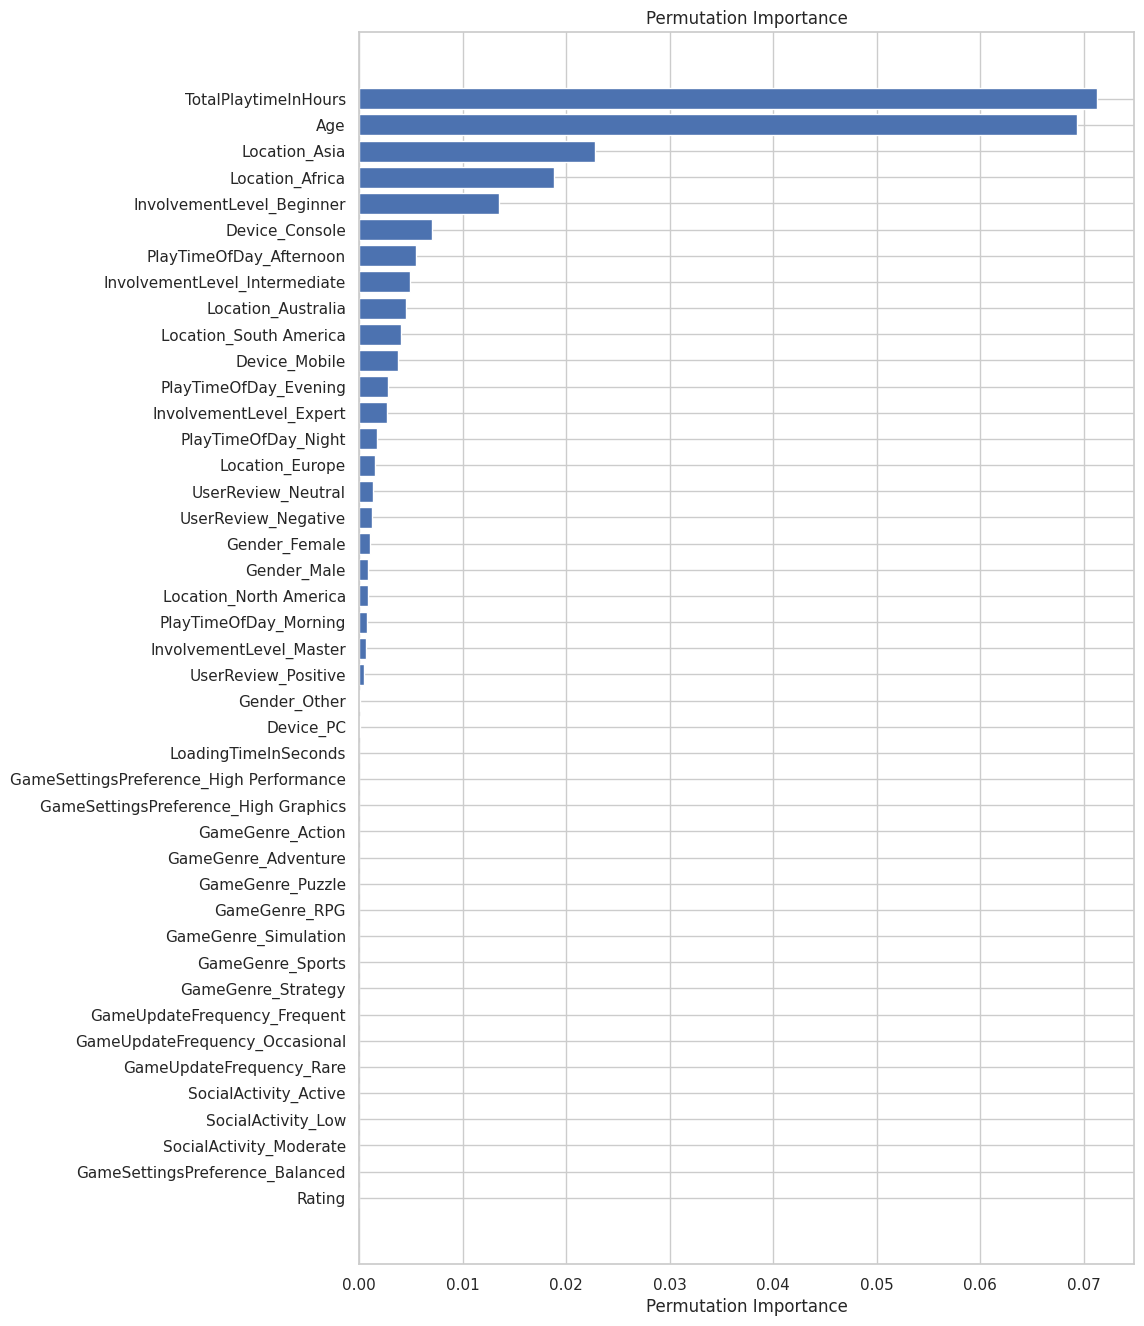

In [ ]:
# Feature importance using Permutation Importance
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=20, random_state=42)

sorted_idx_perm = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 16))
plt.barh(range(len(sorted_idx_perm)), perm_importance.importances_mean[sorted_idx_perm], align="center")
plt.yticks(range(len(sorted_idx_perm)), [features[i] for i in sorted_idx_perm])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance")
plt.show()

In [ ]:
selected_features_perm = X.columns[sorted_idx_perm[::-1][:5]]  # Select top 5 features based on permutation importance
print("Selected Features using Permutation Importance:", selected_features_perm)

Selected Features using Permutation Importance: Index(['TotalPlaytimeInHours', 'Age', 'Location_Asia', 'Location_Africa',
       'InvolvementLevel_Beginner'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

<ipython-input-127-130da02e6091>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



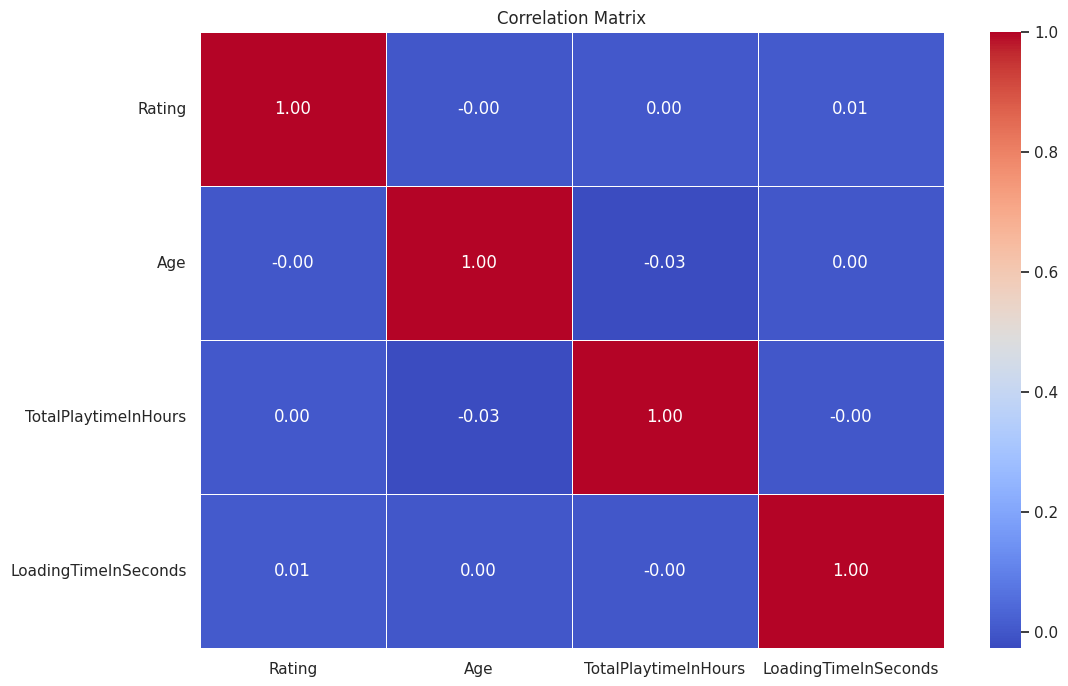

In [ ]:
# Explore correlation between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Encode categorical features
df_encoded = pd.get_dummies(df, columns=['Gender', 'Location', 'Device', 'PlayTimeOfDay', 'PurchaseHistory',
                                         'InvolvementLevel', 'UserReview', 'GameGenre', 'GameUpdateFrequency',
                                         'SocialActivity', 'GameSettingsPreference'], drop_first=True)

In [ ]:
# Split the dataset into features (X) and target (y)
df_encoded = df_encoded.drop(["UserID", "GameTitle"], axis=1)

X = df_encoded.drop('TotalPlaytimeInHours', axis=1)
y = df_encoded['TotalPlaytimeInHours']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature importance using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)

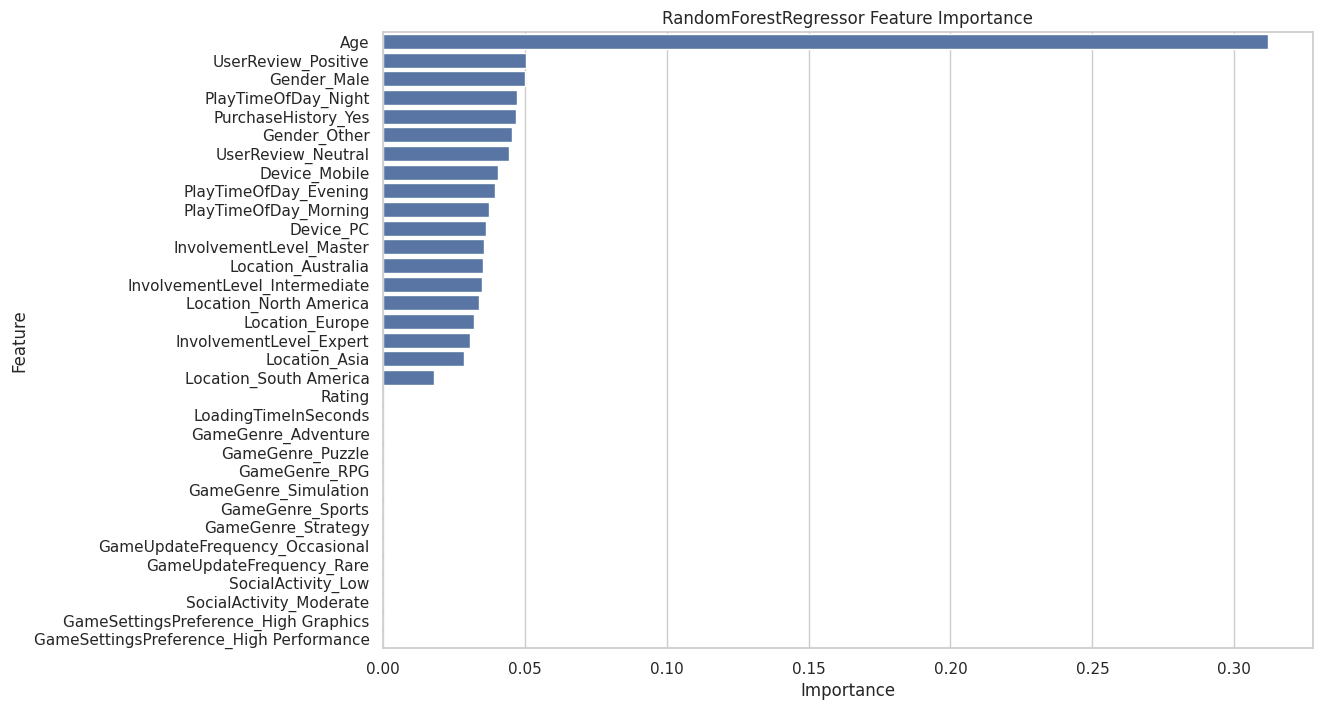

In [ ]:
# Plot RandomForestRegressor feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance)
plt.title('RandomForestRegressor Feature Importance')
plt.show()

In [ ]:
# Feature importance using XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
xgb_feature_importance = xgb_feature_importance.sort_values(by='Importance', ascending=False)

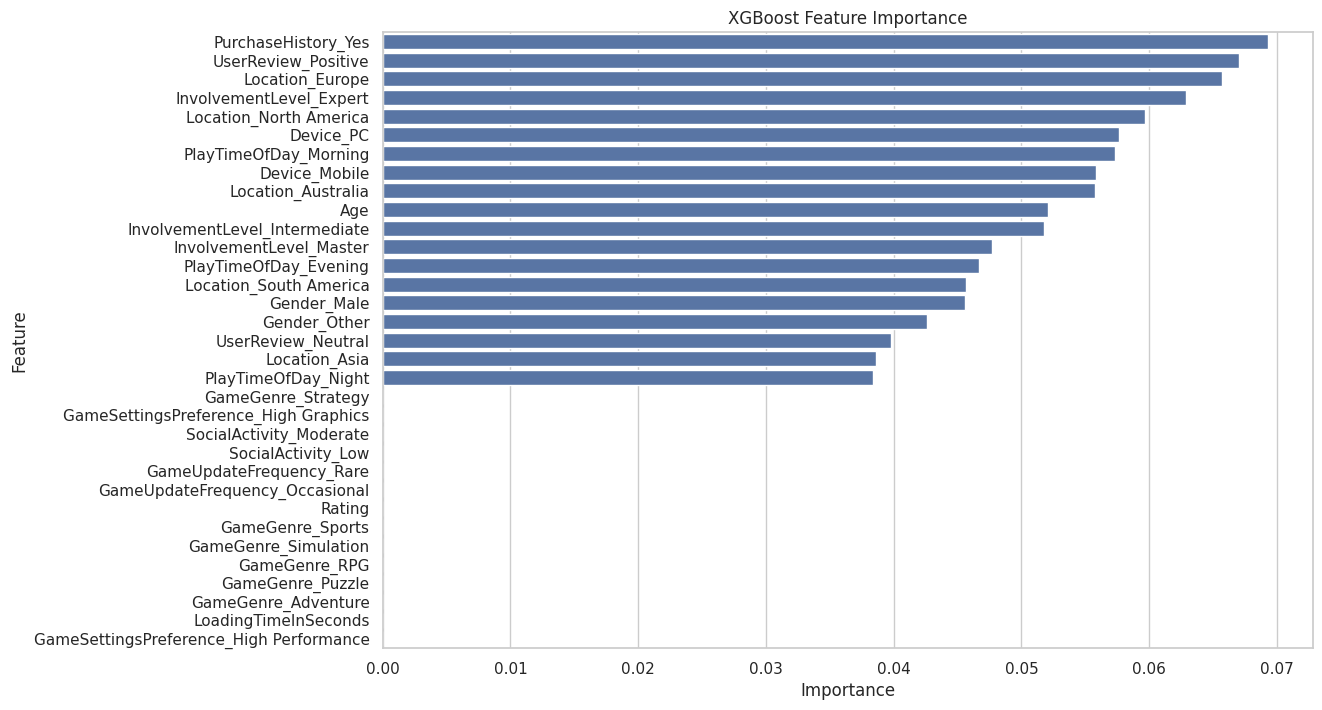

In [ ]:
# Plot XGBoost feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance)
plt.title('XGBoost Feature Importance')
plt.show()

In [ ]:
# Feature importance using Recursive Feature Elimination (RFE)
lr_model = LinearRegression()
rfe = RFE(lr_model, n_features_to_select=1)
rfe.fit(X, y)
rfe_feature_importance = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
rfe_feature_importance = rfe_feature_importance.sort_values(by='Ranking')

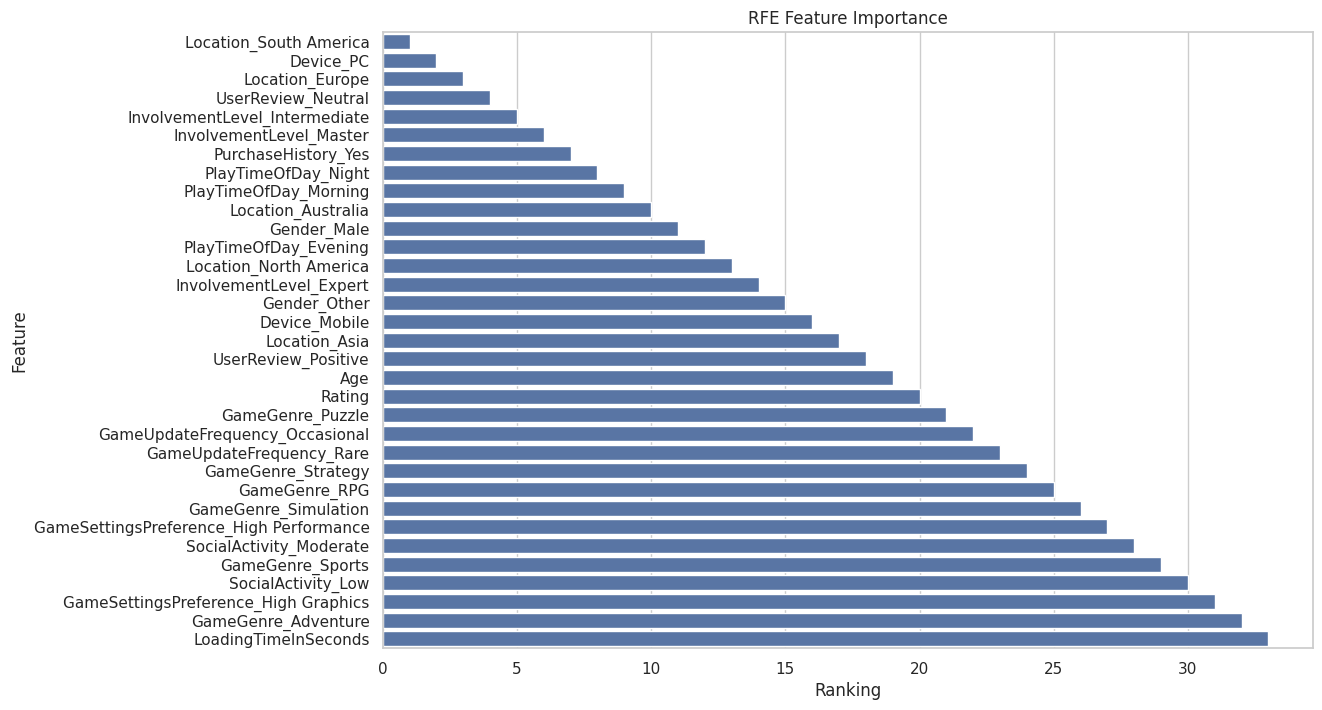

In [ ]:
# Plot RFE feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Ranking', y='Feature', data=rfe_feature_importance)
plt.title('RFE Feature Importance')
plt.show()

In [ ]:
# Evaluate the models
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print(f'RandomForestRegressor Mean Squared Error: {rf_mse}')

RandomForestRegressor Mean Squared Error: 0.00040897999999999987


In [ ]:
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
print(f'XGBoost Mean Squared Error: {xgb_mse}')

XGBoost Mean Squared Error: 79.9044538846872
